
# Import necessary libraries for data manipulation, machine learning, and handle warnings.

In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import wordnet as wn 
import csv
import json
import csv
import joblib
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# DATA COLLECTION
# Load the medical dataset usung PANDAS and display its statistical summary.

In [2]:
dataset = pd.read_csv(r'D:\PROJECT_CHAT_BOT\Medical_Dataset\full dataset.csv')

# DATA CLEANING
Remove leading and trailing whitespace from the 'prognosis' column values.

In [3]:
dataset['prognosis'] = dataset['prognosis'].str.strip() 

# DATA EXPLORING


In [4]:
dataset.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scars_on_skin  skin_peeling  dry_scaly_skin_flakes  \
0           0              0             0                      0   
1           0              0             0                      0   
2           0              0             0                      0   
3           0              0             0                      0   
4           0              0             0                      0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze         prognosis  
0                  0  Fungal infection  
1                  0  Fungal infection  
2                  0  Fungal infection  
3                  0  Fungal infection  
4                  0  Fungal infection  

[5 rows x 133 columns]

In [5]:
dataset.tail()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
4956        0          0                     0                    0   
4957        0          1                     0                    0   
4958        0          0                     0                    0   
4959        0          1                     0                    0   
4960        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
4956          0       0           0             0        0                 0   
4957          0       0           0             0        0                 0   
4958          0       0           0             0        0                 0   
4959          0       0           1             0        0                 0   
4960          0       0           0             0        0                 0   

      ...  blackheads  scars_on_skin  skin_peeling  dry_scaly_skin_flakes  \
4956  ...           0              0             0                      0   
4957  ...           1              1             0                      0   
4958  ...           0              0             0                      0   
4959  ...           0              0             1                      1   
4960  ...           0              0             0                      0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
4956                     0                   0        0                     0   
4957                     0                   0        0                     0   
4958                     0                   0        0                     0   
4959                     1                   1        0                     0   
4960                     0                   0        1                     1   

      yellow_crust_ooze                     prognosis  
4956                  0  Paroymsal Positional Vertigo  
4957                  0                          Acne  
4958                  0       Urinary tract infection  
4959                  0                     Psoriasis  
4960                  1                      Impetigo  

[5 rows x 133 columns]

In [6]:
dataset.shape

(4961, 133)

In [7]:
dataset.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scars_on_skin', 'skin_peeling', 'dry_scaly_skin_flakes',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

Chekcing for null values

In [8]:
dataset.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

# DATA VISUALIZATION

BAR GRAPH

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

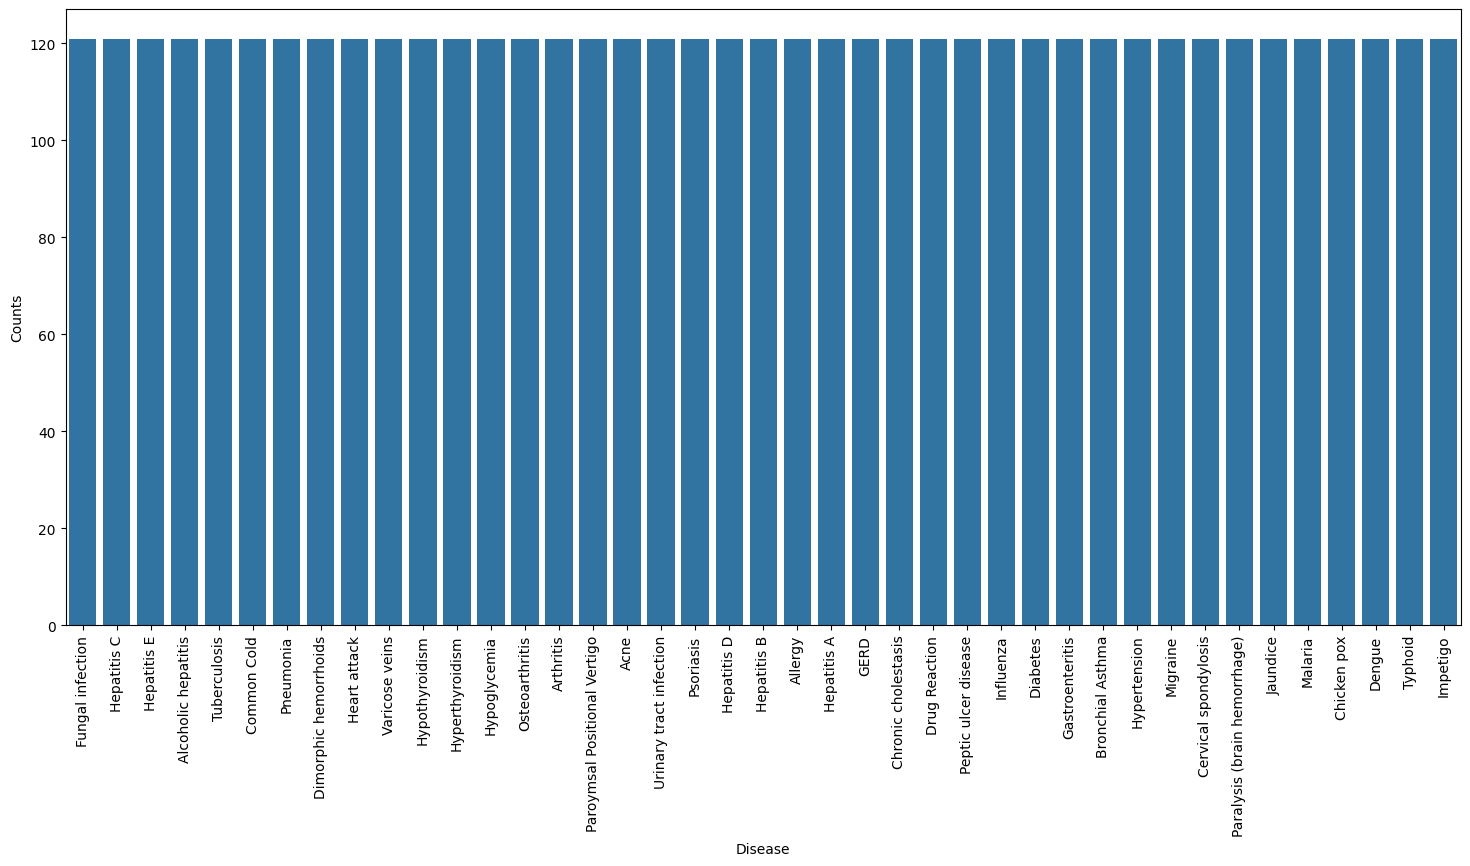

In [10]:
# Checking whether the dataset is balanced or not
disease_counts = dataset["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [11]:
print(dataset['prognosis'].value_counts())

prognosis
Fungal infection                121
Hepatitis C                     121
Hepatitis E                     121
Alcoholic hepatitis             121
Tuberculosis                    121
Common Cold                     121
Pneumonia                       121
Dimorphic hemorrhoids           121
Heart attack                    121
Varicose veins                  121
Hypothyroidism                  121
Hyperthyroidism                 121
Hypoglycemia                    121
Osteoarthritis                  121
Arthritis                       121
Paroymsal Positional Vertigo    121
Acne                            121
Urinary tract infection         121
Psoriasis                       121
Hepatitis D                     121
Hepatitis B                     121
Allergy                         121
Hepatitis A                     121
GERD                            121
Chronic cholestasis             121
Drug Reaction                   121
Peptic ulcer disease            121
Influenza         

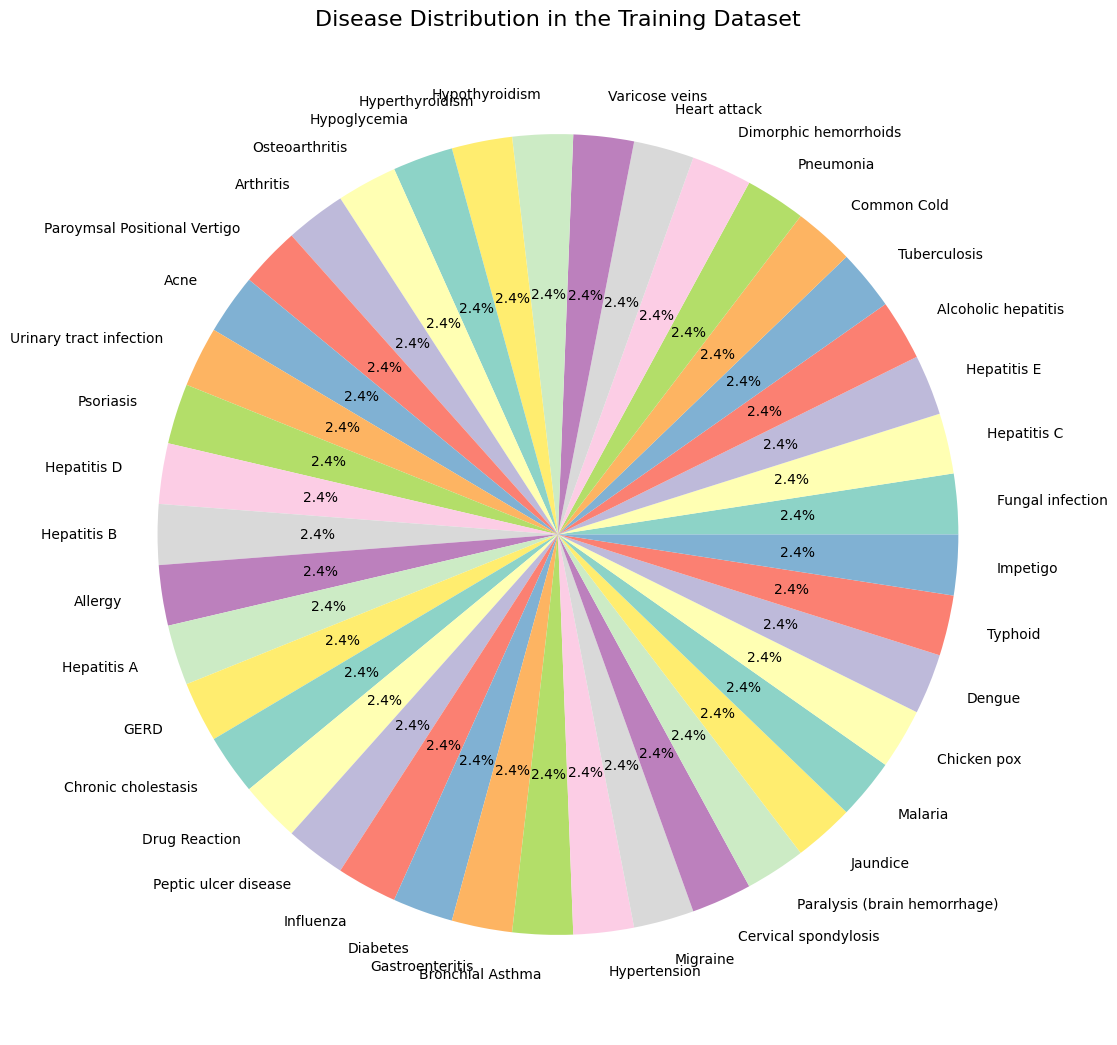

In [12]:
plt.figure(figsize=(13,13))
disease_counts = dataset['prognosis'].value_counts()
plt.pie(disease_counts, labels=disease_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set3', len(disease_counts)))
plt.title('Disease Distribution in the Training Dataset', fontsize=16)
plt.show()

Frequency for all symptoms in dataset

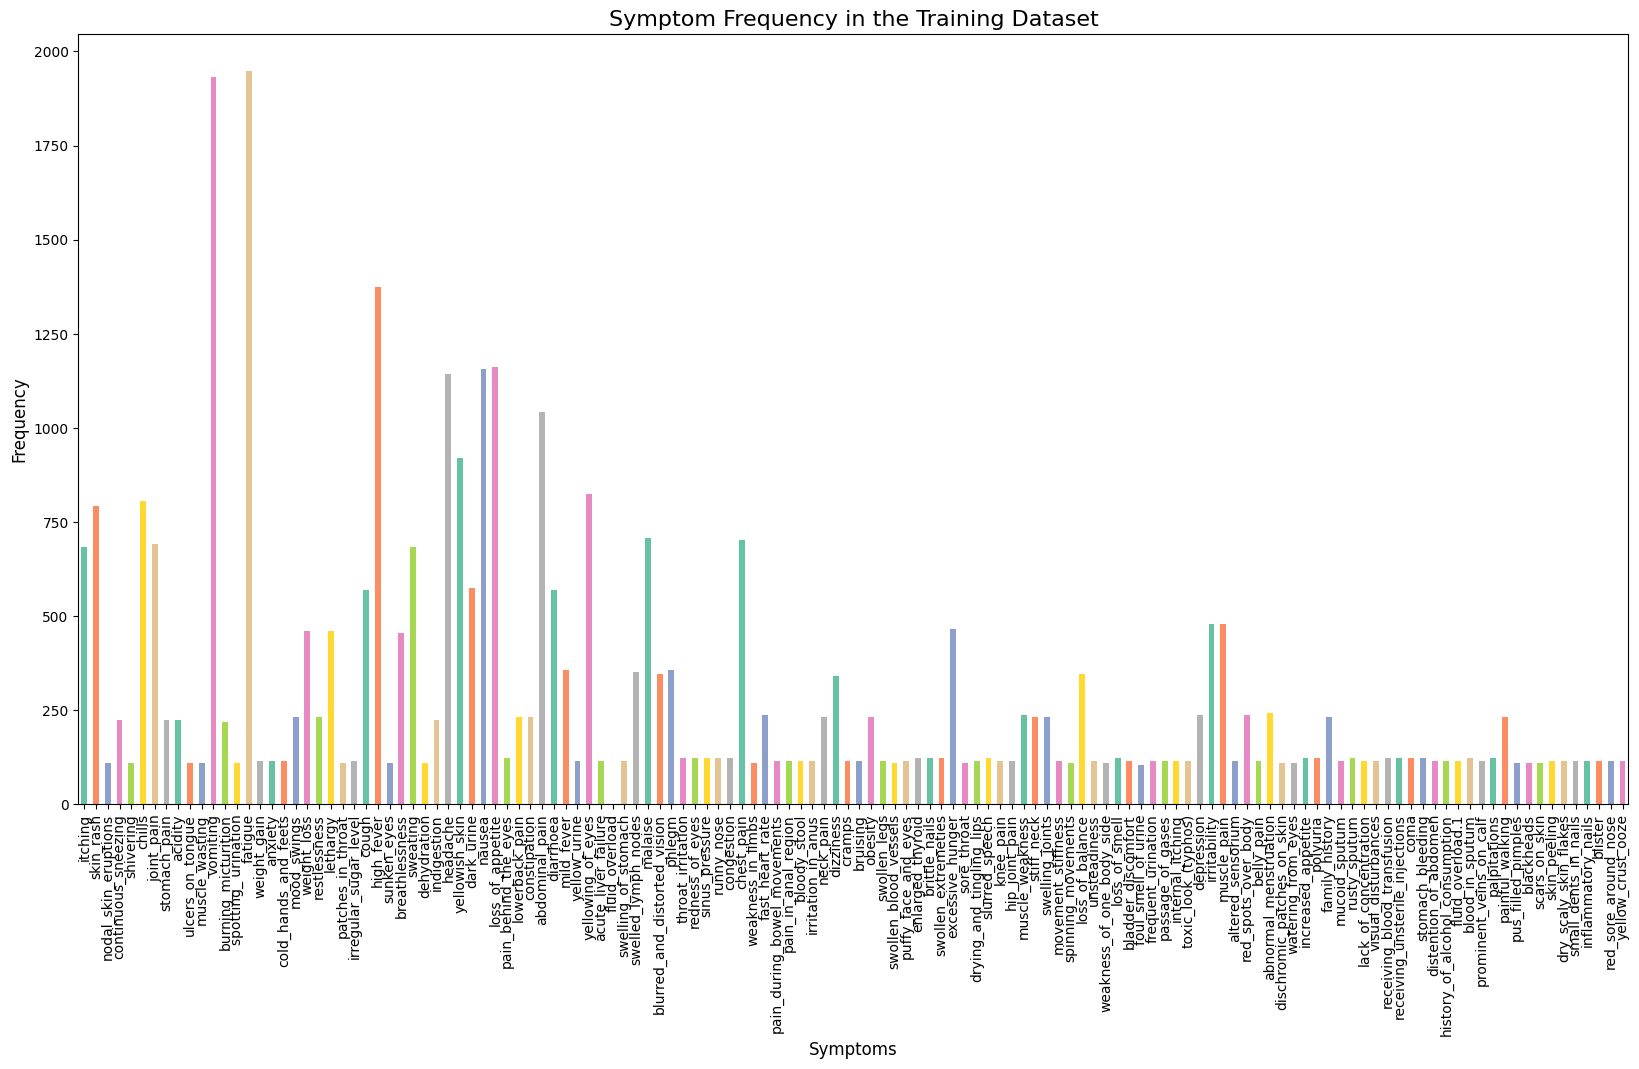

In [13]:
plt.figure(figsize=(20,10))
dataset.drop(columns='prognosis').sum().plot(kind='bar', color=sns.color_palette('Set2', len(dataset.drop(columns='prognosis').columns)))
plt.title('Symptom Frequency in the Training Dataset', fontsize=16)
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Perform univariate feature selection to extract the top 15 features based on mutual information score.

In [14]:
#Univariate Selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

X=dataset.drop('prognosis', axis=1)
y=dataset.prognosis
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(15,'Score'))  

                Specs     Score
14            fatigue  0.584163
11           vomiting  0.571262
25         high_fever  0.550027
35   loss_of_appetite  0.507814
34             nausea  0.485479
31           headache  0.468236
39     abdominal_pain  0.462050
43  yellowing_of_eyes  0.433307
32     yellowish_skin  0.427856
1           skin_rash  0.417268
56         chest_pain  0.394571
5              chills  0.390822
48            malaise  0.387980
6          joint_pain  0.382160
0             itching  0.374684


[0.01620653 0.00693244 0.00795848 0.00570029 0.00652361 0.00784415
 0.0116432  0.0105573  0.00440424 0.00470136 0.00537156 0.01417923
 0.00619389 0.00756285 0.01418933 0.00074969 0.00047772 0.00068787
 0.00292033 0.01354757 0.00294806 0.00305388 0.00754844 0.00119796
 0.00973422 0.0117957  0.00520254 0.01098972 0.01155622 0.00581477
 0.00272444 0.00961702 0.00870574 0.01140716 0.01305556 0.00828087
 0.01212495 0.00913065 0.00257848 0.0092464  0.01505411 0.01631001
 0.0006884  0.01504519 0.00161044 0.         0.00506446 0.00665772
 0.01172885 0.00398579 0.00741271 0.00453148 0.00428396 0.00349993
 0.0047546  0.00205117 0.0118415  0.00472018 0.00733144 0.0068306
 0.00608467 0.00521133 0.00570079 0.0081419  0.00836906 0.00346018
 0.00866484 0.00354691 0.00371838 0.00063276 0.00093563 0.00629202
 0.00851839 0.00433145 0.00379248 0.00671687 0.00095041 0.01026269
 0.01039193 0.00803971 0.01232518 0.00438297 0.00437802 0.00848196
 0.0038446  0.00700245 0.01288211 0.00485052 0.00377048 0.01151

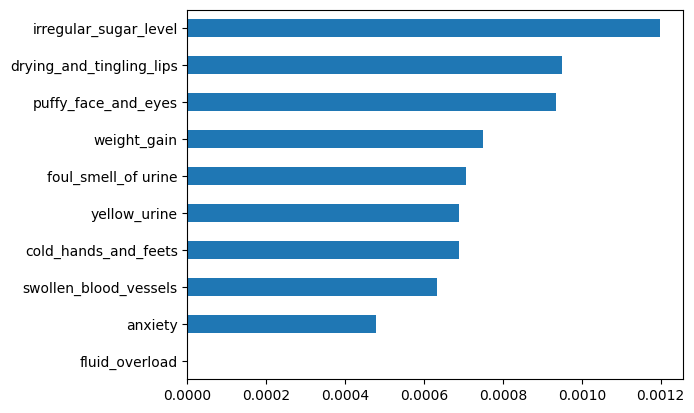

In [15]:
#Feature Importance By smallest connection
import pandas as pd
import numpy as np

X=dataset.drop('prognosis', axis=1)
y=dataset.prognosis
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nsmallest(10).plot(kind='barh')
plt.show()

[0.01549917 0.00650089 0.00877996 0.00673453 0.00512277 0.00821142
 0.01150967 0.01059972 0.00441944 0.00600209 0.00706574 0.01270817
 0.00408349 0.00849828 0.01045541 0.00073168 0.00148433 0.00051276
 0.00249857 0.01103857 0.00338064 0.00372288 0.00590385 0.0021242
 0.008815   0.0128864  0.0059999  0.00957292 0.01001179 0.00598104
 0.00162771 0.0089229  0.00776951 0.01512305 0.01292258 0.01123116
 0.01002055 0.01060292 0.0027196  0.01145223 0.01571895 0.01278138
 0.00149713 0.01544397 0.00227491 0.         0.00639747 0.00641973
 0.01117702 0.00402301 0.00599909 0.0039813  0.00422232 0.00400937
 0.00324995 0.00349979 0.01500868 0.00284352 0.00918511 0.00556311
 0.00567364 0.0049794  0.00731135 0.00778185 0.00626157 0.00583756
 0.00512147 0.00306998 0.00554178 0.00028223 0.00116913 0.00708395
 0.00549148 0.00526688 0.00521642 0.00533636 0.00141664 0.00880314
 0.00872454 0.0087754  0.01232358 0.0041654  0.00326528 0.00785798
 0.00231899 0.01143867 0.01379502 0.00487293 0.00422309 0.00988

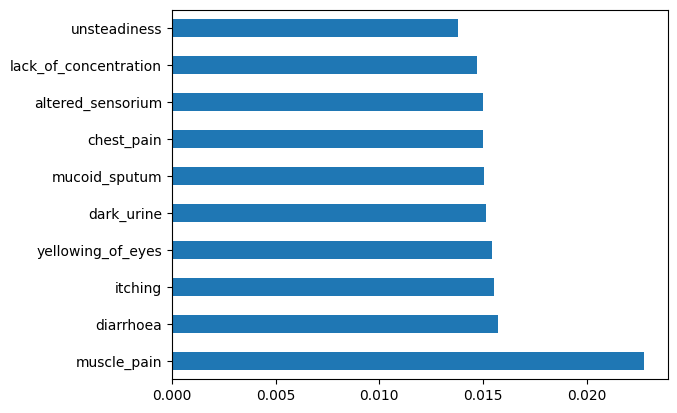

In [16]:
#Feature Importance By largest connection
import pandas as pd
import numpy as np

X=dataset.drop('prognosis', axis=1)
y=dataset.prognosis
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [17]:
import numpy as np

def trimm_correlated(df_in, threshold):
    
    df_corr = df_in.corr(method='kendall', min_periods=1)
    
    
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    
   
    df_out = df_in[un_corr_idx]
    
    return df_out

In [18]:
# Importing necessary libraries for data preprocessing and model training
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from imblearn.over_sampling import RandomOverSampler   # For handling class imbalance through oversampling
from imblearn.under_sampling import RandomUnderSampler  # For handling class imbalance through undersampling

# Dropping the 'prognosis' column from the dataset as it is the target variable
X = dataset.drop('prognosis', axis=1)

# Removing highly correlated features by calling the 'trimm_correlated' function with a threshold of 0.45
X = trimm_correlated(X, 0.5)

# Storing the target variable (prognosis) in 'y'
y = dataset.prognosis

# Printing the column names and number of features remaining after trimming correlated features
print(X.columns, len(X.columns))

# Splitting the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'chills', 'joint_pain', 'stomach_pain', 'acidity', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'fatigue', 'weight_gain', 'anxiety',
       'weight_loss', 'lethargy', 'cough', 'sunken_eyes', 'indigestion',
       'headache', 'yellowish_skin', 'pain_behind_the_eyes', 'constipation',
       'diarrhoea', 'mild_fever', 'yellow_urine', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'cramps', 'muscle_weakness',
       'stiff_neck', 'spinning_movements', 'weakness_of_one_body_side',
       'muscle_pain', 'family_history', 'pus_filled_pimples', 'skin_peeling',
       'blister'],
      dtype='object') 39


In [19]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
dataset['prognosis']= label_encoder.fit_transform(dataset['prognosis'])

In [20]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import seaborn as sns  # For data visualization

# Get the correlation matrix of each feature in the dataset
# .corr() computes the Pearson correlation coefficient between all pairs of numeric columns
corrmat = dataset.corr()

# Extract the list of features sorted by correlation to display in the heatmap
top_corr_features = corrmat.index

# Set the figure size to make the heatmap large and readable
plt.figure(figsize=(100, 100))  # Set the figure size (width, height)

# Plot the heatmap of the correlations between features
# 'annot=True' will display the correlation values on the heatmap cells
# 'cmap="RdYlGn"' sets the color map to a red-yellow-green scale (green for positive, red for negative)
g = sns.heatmap(dataset[top_corr_features].corr(), annot=True, cmap="RdYlGn")

# PERFORMANCE MATRIX

In [21]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,roc_auc_score
from sklearn.metrics import accuracy_score
def all_metrices(y_test,y_pred):
  acc=accuracy_score(y_test, y_pred)
  # auc=roc_auc_score(y_test,y_pred)
  precision=precision_score(y_test, y_pred,average='micro',zero_division=0)
  recall=recall_score(y_test, y_pred,average='micro')
  f1=f1_score(y_test, y_pred,average='micro')
  mcc=matthews_corrcoef(y_test,y_pred)
  kappa=cohen_kappa_score(y_test,y_pred)

  print('Accuracy: %.4f' % (acc*100))
  # print('Roc_Auc Score: %.2f' % (auc*100))
  print('Precision: %.4f' % (precision*100))
  print('recall: %.4f' % (recall*100))
  print('fl score: %.4f' % (f1*100))
  print('Mcc Score: %.4f' % (mcc))
  print('Kappa score: %.4f' % (kappa))
  print('\n')

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train):
    if train:
        pred = clf.predict(X_train)
        
        # clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        
        all_metrices(y_train,pred)
        # print(clf_report)
    elif train==False:
        pred = clf.predict(X_test)
        
        # clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        
        all_metrices(y_test,pred)
        # print(clf_report)

# MODEL TRAINING

# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
knn_clf = KNeighborsClassifier(5)
knn_clf.fit(X_train, y_train)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)
print(classification_report(y_test,knn_clf.predict(X_test)))

Train Result:
Accuracy: 97.8579
Precision: 97.8579
recall: 97.8579
fl score: 97.8579
Mcc Score: 0.9781
Kappa score: 0.9780


Test Result:
Accuracy: 96.4753
Precision: 96.4753
recall: 96.4753
fl score: 96.4753
Mcc Score: 0.9641
Kappa score: 0.9639


                              precision    recall  f1-score   support

                        Acne       0.96      1.00      0.98        25
         Alcoholic hepatitis       1.00      0.93      0.96        29
                     Allergy       1.00      1.00      1.00        26
                   Arthritis       1.00      1.00      1.00        24
            Bronchial Asthma       1.00      0.86      0.93        29
        Cervical spondylosis       0.54      1.00      0.70        21
                 Chicken pox       1.00      1.00      1.00        20
         Chronic cholestasis       0.92      1.00      0.96        24
                 Common Cold       1.00      1.00      1.00        20
                      Dengue       1.00      1.00 

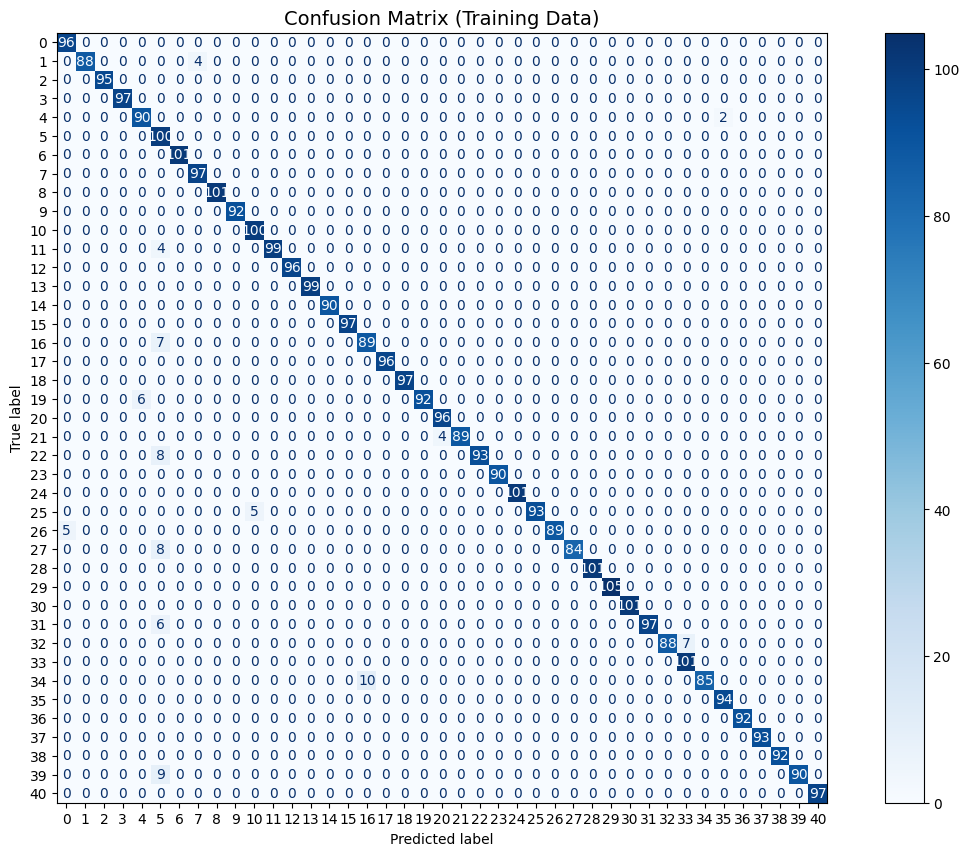

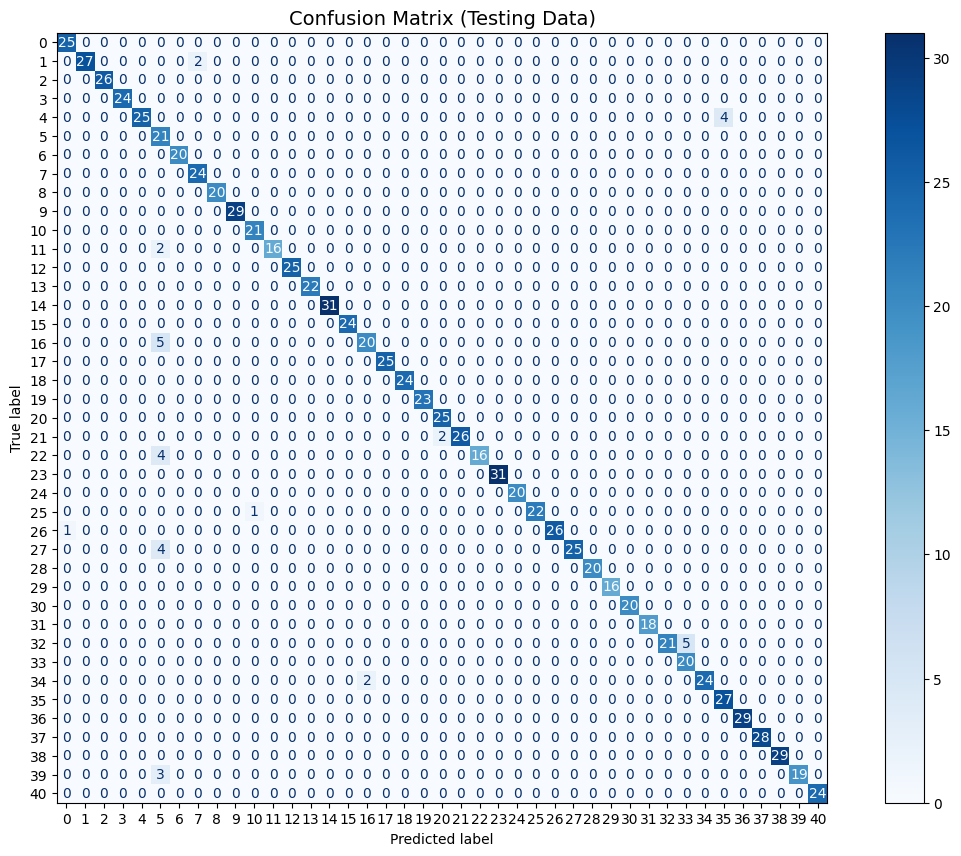

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X, y, dataset_type):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots(figsize=(15, 10))  # Increase image size
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f'Confusion Matrix ({dataset_type})', fontsize=14)
    plt.show()

# Plot for training data
plot_confusion_matrix(knn_clf, X_train, y_train, "Training Data")

# Plot for testing data
plot_confusion_matrix(knn_clf, X_test, y_test, "Testing Data")

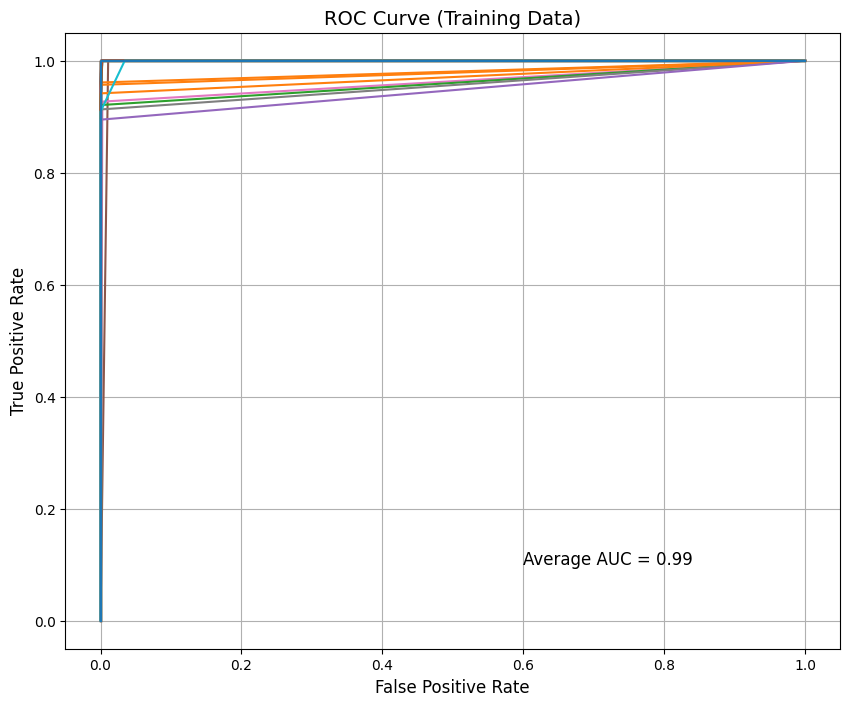

Average AUC: 0.99


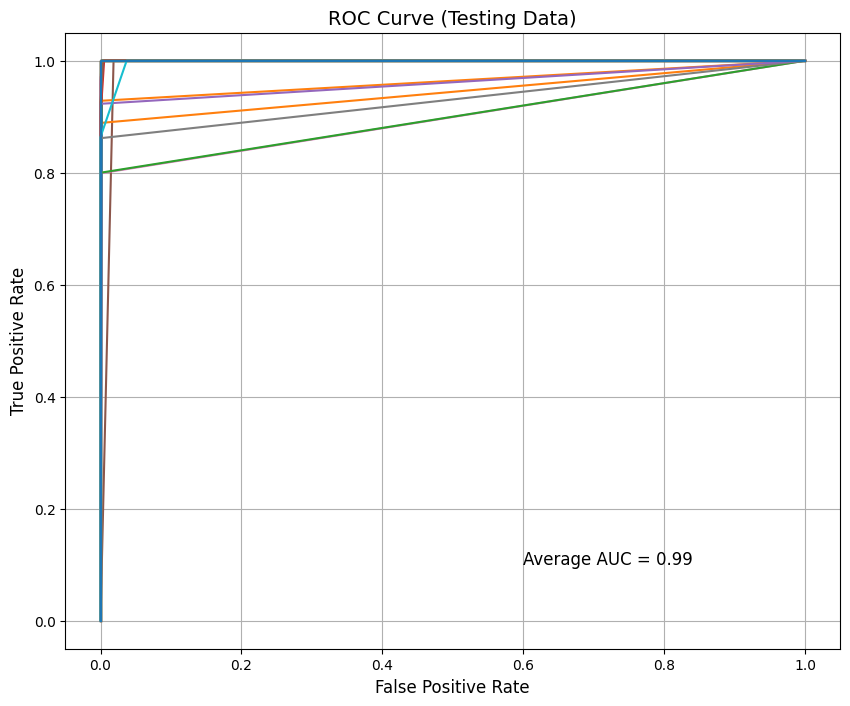

Average AUC: 0.99


In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_roc_curve(model, X, y, dataset_type):
    y_pred_proba = model.predict_proba(X)
    plt.figure(figsize=(10, 8))  # Increase image size
    auc_scores = []
    
    if len(set(y)) > 2:  # Multi-class
        y_binarized = label_binarize(y, classes=sorted(set(y)))
        
        for i in range(y_binarized.shape[1]):
            fpr, tpr, _ = roc_curve(y_binarized[:, i], y_pred_proba[:, i])
            auc = roc_auc_score(y_binarized[:, i], y_pred_proba[:, i])
            auc_scores.append(auc)
            plt.plot(fpr, tpr)  # Plot the ROC curve without labeling individual AUC
        
        plt.title(f'ROC Curve ({dataset_type})', fontsize=14)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.grid()

        # Display the average AUC score beside the plot
        avg_auc = sum(auc_scores) / len(auc_scores)
        plt.text(0.6, 0.1, f'Average AUC = {avg_auc:.2f}', fontsize=12, color='black')

        plt.show()
        print(f'Average AUC: {avg_auc:.2f}')
    
    else:  # Binary classification
        fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
        auc = roc_auc_score(y, y_pred_proba[:, 1])
        plt.plot(fpr, tpr)  # Plot the ROC curve without labeling individual AUC
        
        plt.title(f'ROC Curve ({dataset_type})', fontsize=14)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.grid()

        # Display the AUC score beside the plot for binary classification
        plt.text(0.6, 0.1, f'AUC = {auc:.2f}', fontsize=12, color='black')
        
        plt.show()

# Plot for training data
plot_roc_curve(knn_clf, X_train, y_train, "Training Data")

# Plot for testing data
plot_roc_curve(knn_clf, X_test, y_test, "Testing Data")


In [26]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Define function to calculate accuracy and "loss"
def calculate_accuracy_and_loss(model, X_train, y_train, X_test, y_test):
    # Calculate training accuracy and loss
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_loss = 1 - train_accuracy  # Loss is 1 - accuracy

    # Calculate testing accuracy and loss
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_loss = 1 - test_accuracy  # Loss is 1 - accuracy

    return train_accuracy, test_accuracy, train_loss, test_loss

# Fit the model
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Calculate the metrics after fitting the model
train_accuracy, test_accuracy, train_loss, test_loss = calculate_accuracy_and_loss(
    knn_clf, X_train, y_train, X_test, y_test
)


print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

# Print Training and Testing Metrics with rounded values
print("\nTraining Accuracy: ", round(train_accuracy, 2))
print("Testing Accuracy: ", round(test_accuracy, 2))
print("Training Loss: ", round(train_loss, 2))
print("Testing Loss: ", round(test_loss, 2))

# Perform Cross-Validation
cv_scores = cross_val_score(knn_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print Cross-Validation Results with rounded values
print("\nCross-Validation Results:")
print(f"Cross-validation scores: {np.round(cv_scores, 2)}")
print(f"Mean Cross-validation score: {round(np.mean(cv_scores), 2)}")
print(f"Standard Deviation of Cross-validation scores: {round(np.std(cv_scores), 2)}")


Train Result:
Accuracy: 97.8579
Precision: 97.8579
recall: 97.8579
fl score: 97.8579
Mcc Score: 0.9781
Kappa score: 0.9780


Test Result:
Accuracy: 96.4753
Precision: 96.4753
recall: 96.4753
fl score: 96.4753
Mcc Score: 0.9641
Kappa score: 0.9639



Training Accuracy:  0.98
Testing Accuracy:  0.96
Training Loss:  0.02
Testing Loss:  0.04

Cross-Validation Results:
Cross-validation scores: [0.97 0.98 0.98 0.98 0.97]
Mean Cross-validation score: 0.98
Standard Deviation of Cross-validation scores: 0.0


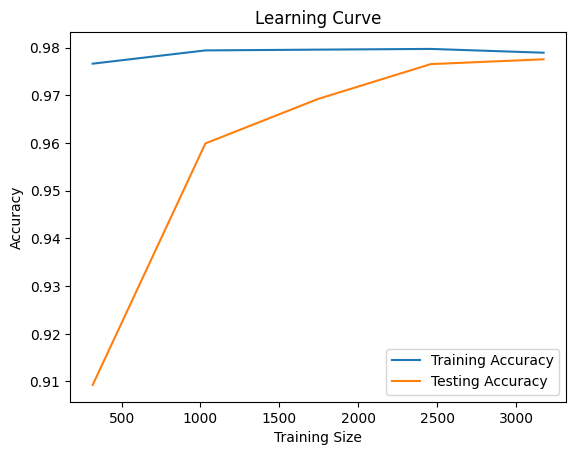

In [27]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    DecisionTreeClassifier(random_state=42), X_train, y_train, cv=5, n_jobs=-1)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Accuracy")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Testing Accuracy")
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# DECISTION TREE

In [28]:
from sklearn.tree import DecisionTreeClassifier


# tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf = DecisionTreeClassifier(
     random_state=42,
    ccp_alpha=0.01 # Require at least 5 samples per leaf
)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

print(classification_report(y_test,tree_clf.predict(X_test)))

Train Result:
Accuracy: 93.5736
Precision: 93.5736
recall: 93.5736
fl score: 93.5736
Mcc Score: 0.9345
Kappa score: 0.9341


Test Result:
Accuracy: 90.6344
Precision: 90.6344
recall: 90.6344
fl score: 90.6344
Mcc Score: 0.9050
Kappa score: 0.9040


                              precision    recall  f1-score   support

                        Acne       1.00      0.92      0.96        25
         Alcoholic hepatitis       1.00      0.93      0.96        29
                     Allergy       0.88      0.88      0.88        26
                   Arthritis       0.91      0.88      0.89        24
            Bronchial Asthma       1.00      0.86      0.93        29
        Cervical spondylosis       0.33      1.00      0.49        21
                 Chicken pox       0.86      0.90      0.88        20
         Chronic cholestasis       0.79      0.96      0.87        24
                 Common Cold       1.00      0.90      0.95        20
                      Dengue       1.00      1.00 

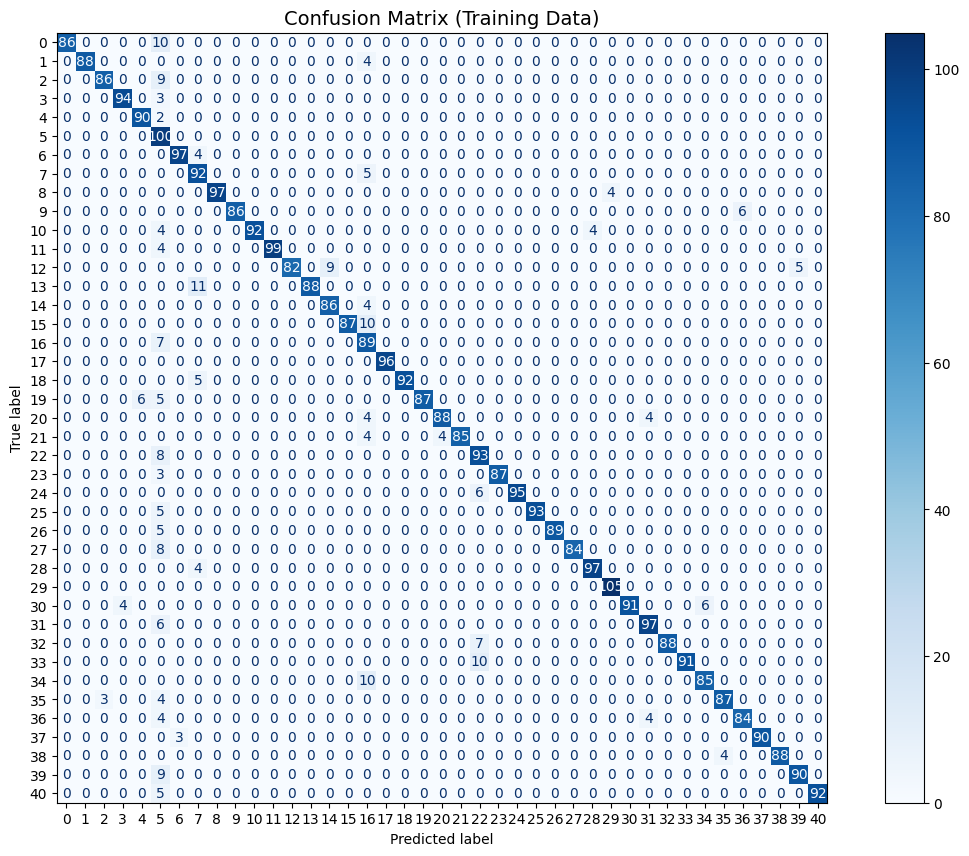

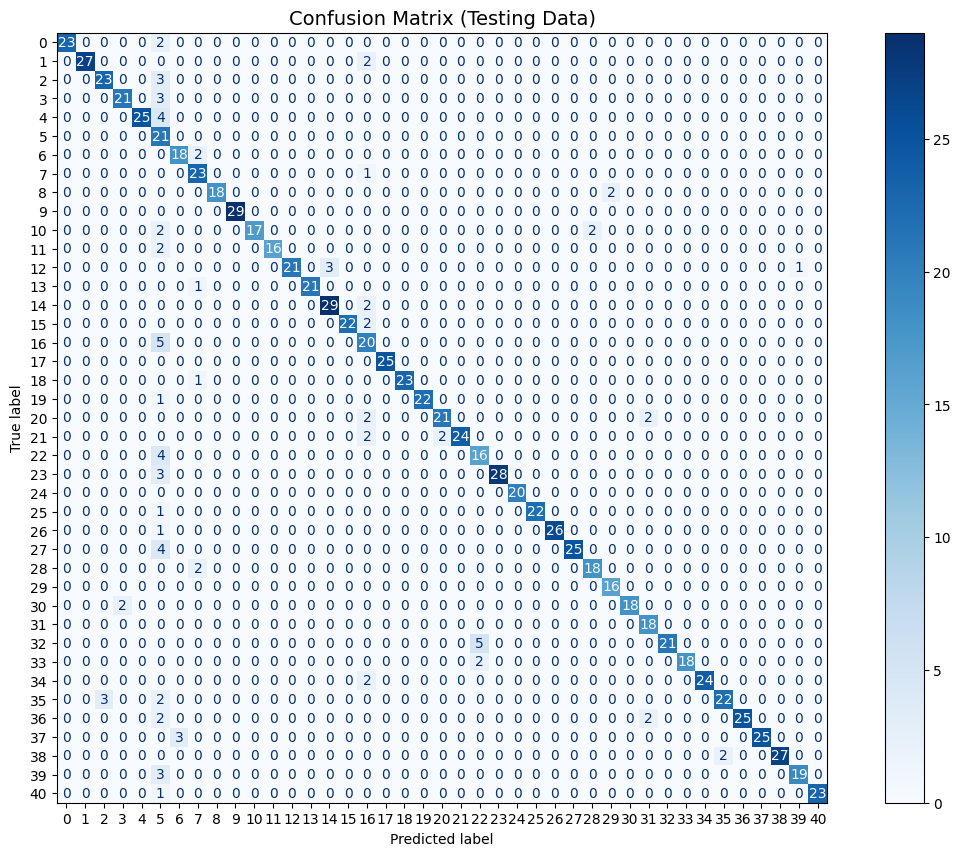

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X, y, dataset_type):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots(figsize=(15, 10))  # Increase image size
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f'Confusion Matrix ({dataset_type})', fontsize=14)
    plt.show()

# Plot for training data
plot_confusion_matrix(tree_clf, X_train, y_train, "Training Data")

# Plot for testing data
plot_confusion_matrix(tree_clf, X_test, y_test, "Testing Data")

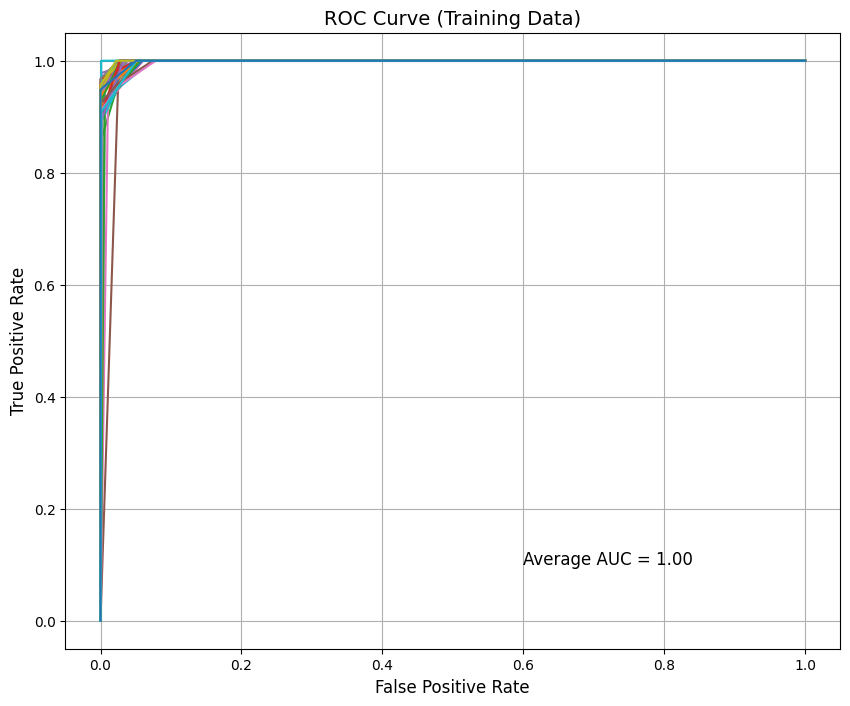

Average AUC: 1.00


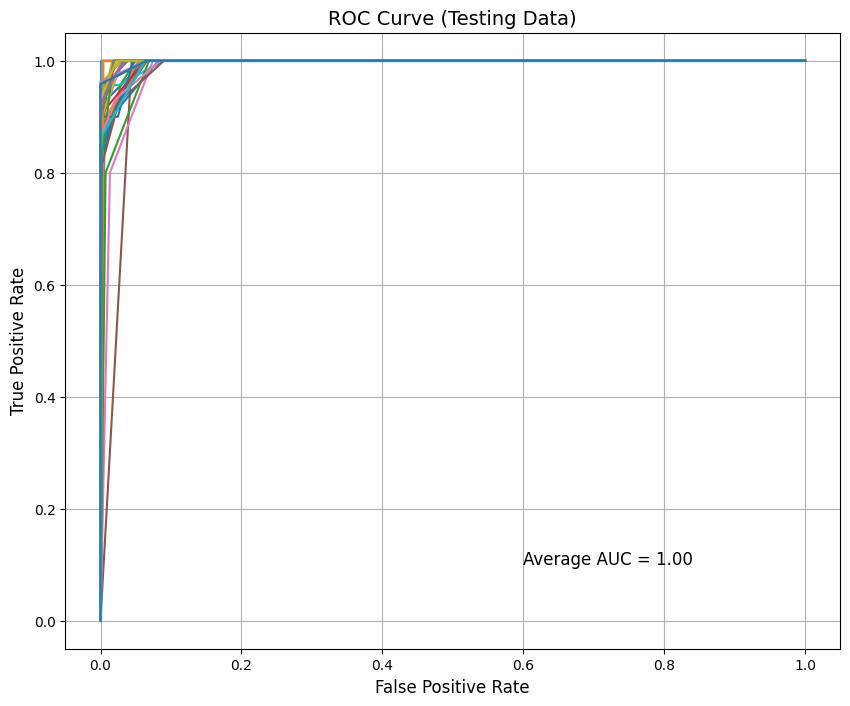

Average AUC: 1.00


In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_roc_curve(model, X, y, dataset_type):
    y_pred_proba = model.predict_proba(X)
    plt.figure(figsize=(10, 8))  # Increase image size
    auc_scores = []
    
    if len(set(y)) > 2:  # Multi-class
        y_binarized = label_binarize(y, classes=sorted(set(y)))
        
        for i in range(y_binarized.shape[1]):
            fpr, tpr, _ = roc_curve(y_binarized[:, i], y_pred_proba[:, i])
            auc = roc_auc_score(y_binarized[:, i], y_pred_proba[:, i])
            auc_scores.append(auc)
            plt.plot(fpr, tpr)  # Plot the ROC curve without labeling individual AUC
        
        plt.title(f'ROC Curve ({dataset_type})', fontsize=14)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.grid()

        # Display the average AUC score beside the plot
        avg_auc = sum(auc_scores) / len(auc_scores)
        plt.text(0.6, 0.1, f'Average AUC = {avg_auc:.2f}', fontsize=12, color='black')

        plt.show()
        print(f'Average AUC: {avg_auc:.2f}')
    
    else:  # Binary classification
        fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
        auc = roc_auc_score(y, y_pred_proba[:, 1])
        plt.plot(fpr, tpr)  # Plot the ROC curve without labeling individual AUC
        
        plt.title(f'ROC Curve ({dataset_type})', fontsize=14)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.grid()

        # Display the AUC score beside the plot for binary classification
        plt.text(0.6, 0.1, f'AUC = {auc:.2f}', fontsize=12, color='black')
        
        plt.show()

# Plot for training data
plot_roc_curve(tree_clf, X_train, y_train, "Training Data")

# Plot for testing data
plot_roc_curve(tree_clf, X_test, y_test, "Testing Data")


In [31]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Define function to calculate accuracy and "loss"
def calculate_accuracy_and_loss(model, X_train, y_train, X_test, y_test):
    # Calculate training accuracy and loss
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_loss = 1 - train_accuracy  # Loss is 1 - accuracy

    # Calculate testing accuracy and loss
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_loss = 1 - test_accuracy  # Loss is 1 - accuracy

    return train_accuracy, test_accuracy, train_loss, test_loss


# Calculate the metrics after fitting the model
train_accuracy, test_accuracy, train_loss, test_loss = calculate_accuracy_and_loss(
    tree_clf, X_train, y_train, X_test, y_test
)

# Print the classification report
# print("Classification Report:")
# print(classification_report(y_test, knn_clf.predict(X_test)))

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

# Print Training and Testing Metrics with rounded values
print("\nTraining Accuracy: ", round(train_accuracy, 2))
print("Testing Accuracy: ", round(test_accuracy, 2))
print("Training Loss: ", round(train_loss, 2))
print("Testing Loss: ", round(test_loss, 2))

# Perform Cross-Validation
cv_scores = cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print Cross-Validation Results with rounded values
print("\nCross-Validation Results:")
print(f"Cross-validation scores: {np.round(cv_scores, 2)}")
print(f"Mean Cross-validation score: {round(np.mean(cv_scores), 2)}")
print(f"Standard Deviation of Cross-validation scores: {round(np.std(cv_scores), 2)}")


Train Result:
Accuracy: 93.5736
Precision: 93.5736
recall: 93.5736
fl score: 93.5736
Mcc Score: 0.9345
Kappa score: 0.9341


Test Result:
Accuracy: 90.6344
Precision: 90.6344
recall: 90.6344
fl score: 90.6344
Mcc Score: 0.9050
Kappa score: 0.9040



Training Accuracy:  0.94
Testing Accuracy:  0.91
Training Loss:  0.06
Testing Loss:  0.09

Cross-Validation Results:
Cross-validation scores: [0.92 0.92 0.93 0.93 0.93]
Mean Cross-validation score: 0.93
Standard Deviation of Cross-validation scores: 0.0


# ADABOOSTING

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Initialize DecisionTreeClassifier with fixed random_state
estimator = DecisionTreeClassifier(max_depth=7, min_samples_split=5, random_state=42)
ada_clf = AdaBoostClassifier(estimator=estimator, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [200],
    'learning_rate': [0.5],
    'algorithm': ['SAMME']
}

# Initialize GridSearchCV without random_state (no such parameter)
grid_search = GridSearchCV(ada_clf, param_grid, cv=5, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_ada_clf = grid_search.best_estimator_

# Train the model
best_ada_clf.fit(X_train, y_train)


# Print training and testing evaluation (ensure you have the print_score function)
print_score(best_ada_clf, X_train, y_train, X_test, y_test, train=True)  # Training evaluation
print_score(best_ada_clf, X_train, y_train, X_test, y_test, train=False)  # Testing evaluation

cv_scores = cross_val_score(best_ada_clf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")

# Print the classification report
print(classification_report(y_test, best_ada_clf.predict(X_test)))



Train Result:
Accuracy: 97.8579
Precision: 97.8579
recall: 97.8579
fl score: 97.8579
Mcc Score: 0.9781
Kappa score: 0.9780


Test Result:
Accuracy: 96.4753
Precision: 96.4753
recall: 96.4753
fl score: 96.4753
Mcc Score: 0.9641
Kappa score: 0.9639


Cross-Validation Accuracy: 0.9778
                              precision    recall  f1-score   support

                        Acne       0.96      1.00      0.98        25
         Alcoholic hepatitis       1.00      0.93      0.96        29
                     Allergy       1.00      1.00      1.00        26
                   Arthritis       1.00      1.00      1.00        24
            Bronchial Asthma       1.00      0.86      0.93        29
        Cervical spondylosis       0.54      1.00      0.70        21
                 Chicken pox       1.00      1.00      1.00        20
         Chronic cholestasis       0.92      1.00      0.96        24
                 Common Cold       1.00      1.00      1.00        20
                

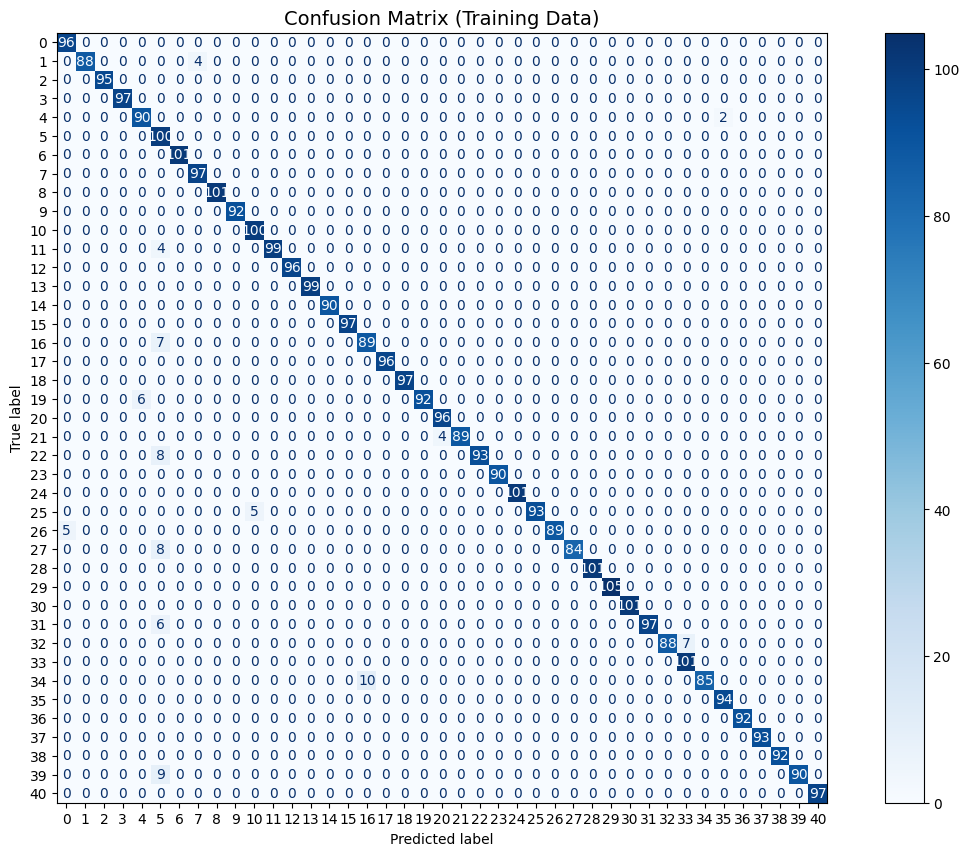

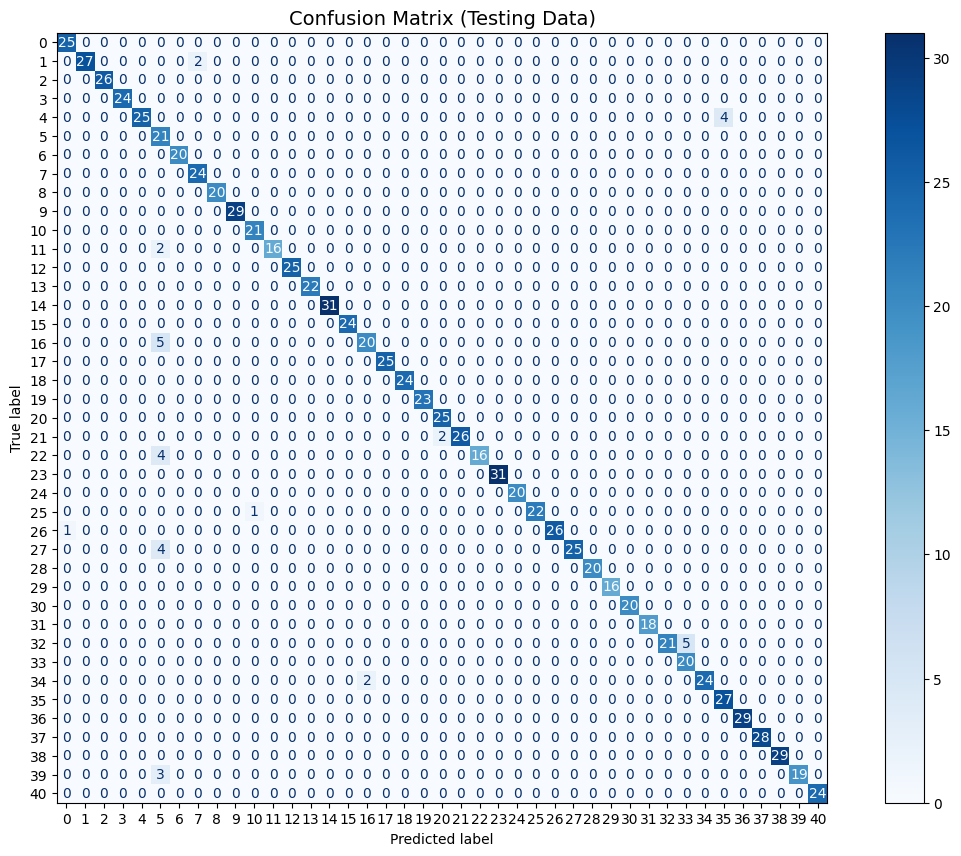

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X, y, dataset_type):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots(figsize=(15, 10))  # Increase image size
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f'Confusion Matrix ({dataset_type})', fontsize=14)
    plt.show()

# Plot for training data
plot_confusion_matrix(best_ada_clf, X_train, y_train, "Training Data")

# Plot for testing data
plot_confusion_matrix(best_ada_clf, X_test, y_test, "Testing Data")

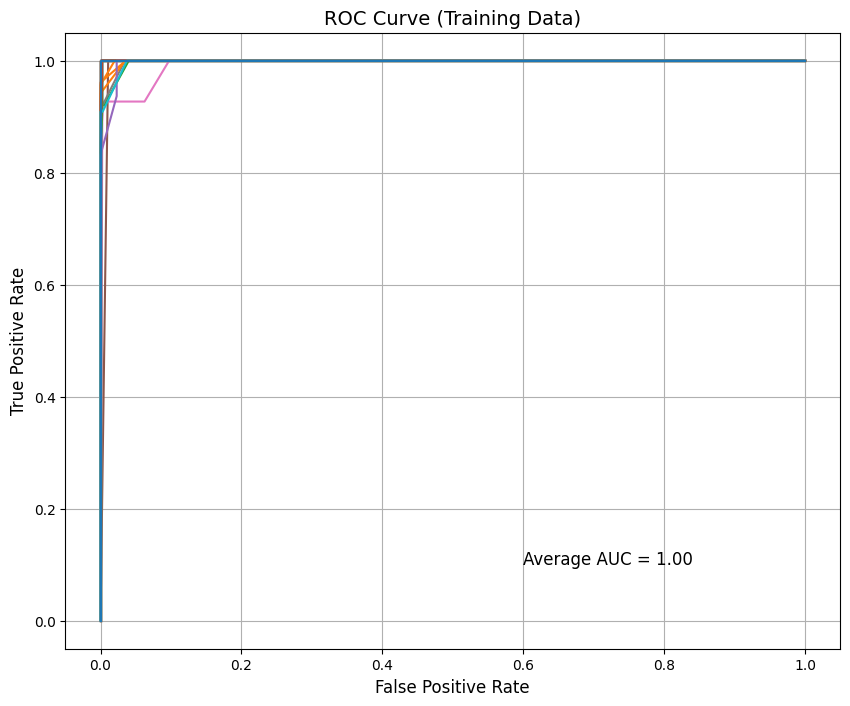

Average AUC: 1.00


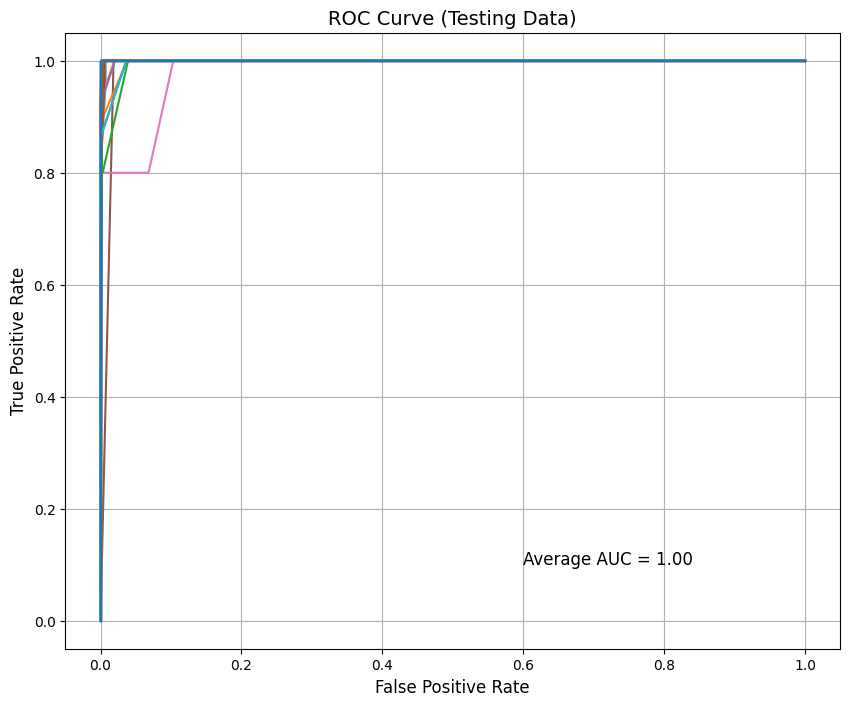

Average AUC: 1.00


In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_roc_curve(model, X, y, dataset_type):
    y_pred_proba = model.predict_proba(X)
    plt.figure(figsize=(10, 8))  # Increase image size
    auc_scores = []
    
    if len(set(y)) > 2:  # Multi-class
        y_binarized = label_binarize(y, classes=sorted(set(y)))
        
        for i in range(y_binarized.shape[1]):
            fpr, tpr, _ = roc_curve(y_binarized[:, i], y_pred_proba[:, i])
            auc = roc_auc_score(y_binarized[:, i], y_pred_proba[:, i])
            auc_scores.append(auc)
            plt.plot(fpr, tpr)  # Plot the ROC curve without labeling individual AUC
        
        plt.title(f'ROC Curve ({dataset_type})', fontsize=14)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.grid()

        # Display the average AUC score beside the plot
        avg_auc = sum(auc_scores) / len(auc_scores)
        plt.text(0.6, 0.1, f'Average AUC = {avg_auc:.2f}', fontsize=12, color='black')

        plt.show()
        print(f'Average AUC: {avg_auc:.2f}')
    
    else:  # Binary classification
        fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
        auc = roc_auc_score(y, y_pred_proba[:, 1])
        plt.plot(fpr, tpr)  # Plot the ROC curve without labeling individual AUC
        
        plt.title(f'ROC Curve ({dataset_type})', fontsize=14)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.grid()

        # Display the AUC score beside the plot for binary classification
        plt.text(0.6, 0.1, f'AUC = {auc:.2f}', fontsize=12, color='black')
        
        plt.show()

# Plot for training data
plot_roc_curve(best_ada_clf, X_train, y_train, "Training Data")

# Plot for testing data
plot_roc_curve(best_ada_clf, X_test, y_test, "Testing Data")


In [35]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Define function to calculate accuracy and "loss"
def calculate_accuracy_and_loss(model, X_train, y_train, X_test, y_test):
    # Calculate training accuracy and loss
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_loss = 1 - train_accuracy  # Loss is 1 - accuracy

    # Calculate testing accuracy and loss
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_loss = 1 - test_accuracy  # Loss is 1 - accuracy

    return train_accuracy, test_accuracy, train_loss, test_loss


print_score(best_ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(best_ada_clf, X_train, y_train, X_test, y_test, train=False)

# Print Training and Testing Metrics with rounded values
print("\nTraining Accuracy: ", round(train_accuracy, 2))
print("Testing Accuracy: ", round(test_accuracy, 2))
print("Training Loss: ", round(train_loss, 2))
print("Testing Loss: ", round(test_loss, 2))

# Perform Cross-Validation
cv_scores = cross_val_score(best_ada_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print Cross-Validation Results with rounded values
print("\nCross-Validation Results:")
print(f"Cross-validation scores: {np.round(cv_scores, 2)}")
print(f"Mean Cross-validation score: {round(np.mean(cv_scores), 2)}")
print(f"Standard Deviation of Cross-validation scores: {round(np.std(cv_scores), 2)}")


Train Result:
Accuracy: 97.8579
Precision: 97.8579
recall: 97.8579
fl score: 97.8579
Mcc Score: 0.9781
Kappa score: 0.9780


Test Result:
Accuracy: 96.4753
Precision: 96.4753
recall: 96.4753
fl score: 96.4753
Mcc Score: 0.9641
Kappa score: 0.9639



Training Accuracy:  0.94
Testing Accuracy:  0.91
Training Loss:  0.06
Testing Loss:  0.09

Cross-Validation Results:
Cross-validation scores: [0.97 0.98 0.98 0.98 0.98]
Mean Cross-validation score: 0.98
Standard Deviation of Cross-validation scores: 0.0


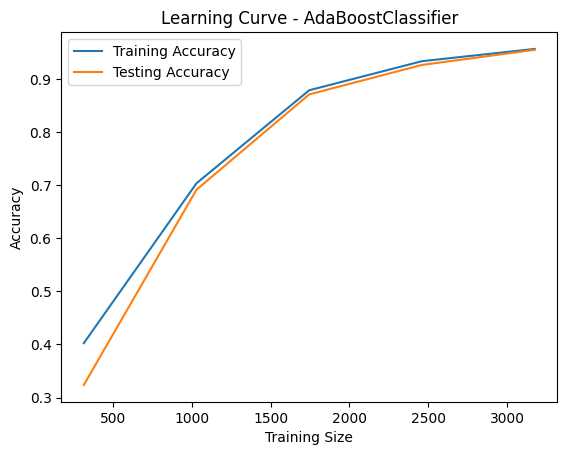

In [36]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt

# Initialize AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=200, learning_rate=0.5, random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    ada_clf, X_train, y_train, cv=5, n_jobs=-1)

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training Accuracy")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Testing Accuracy")
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve - AdaBoostClassifier')
plt.legend()
plt.show()


# RF

In [37]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1500, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)
print(classification_report(y_test,rf_clf.predict(X_test)))

Train Result:
Accuracy: 97.8831
Precision: 97.8831
recall: 97.8831
fl score: 97.8831
Mcc Score: 0.9784
Kappa score: 0.9783


Test Result:
Accuracy: 96.3746
Precision: 96.3746
recall: 96.3746
fl score: 96.3746
Mcc Score: 0.9631
Kappa score: 0.9628


                              precision    recall  f1-score   support

                        Acne       0.96      1.00      0.98        25
         Alcoholic hepatitis       1.00      0.93      0.96        29
                     Allergy       1.00      1.00      1.00        26
                   Arthritis       1.00      1.00      1.00        24
            Bronchial Asthma       1.00      0.86      0.93        29
        Cervical spondylosis       0.54      1.00      0.70        21
                 Chicken pox       1.00      1.00      1.00        20
         Chronic cholestasis       0.92      1.00      0.96        24
                 Common Cold       1.00      1.00      1.00        20
                      Dengue       1.00      1.00 

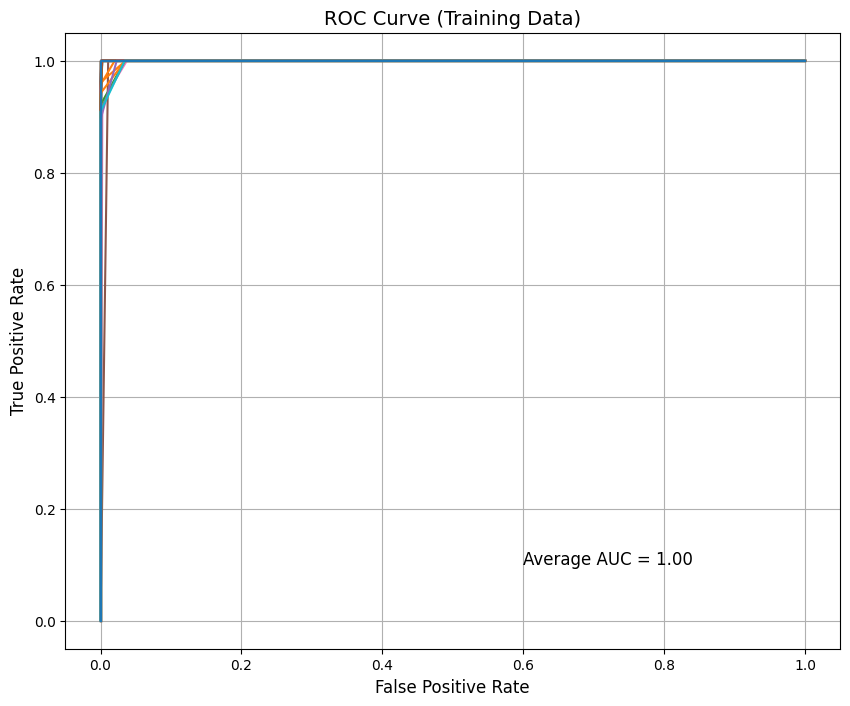

Average AUC: 1.00


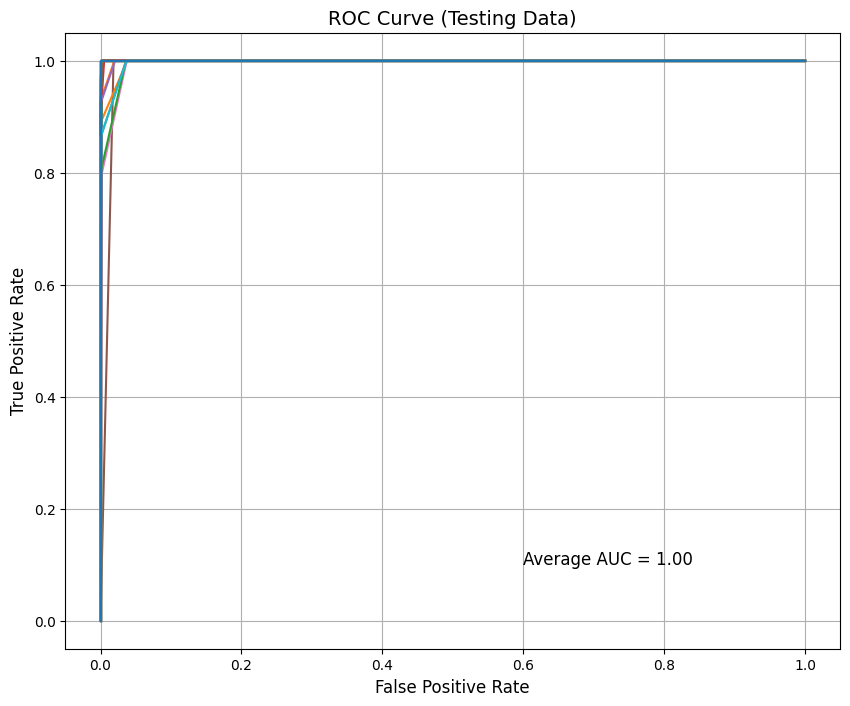

Average AUC: 1.00


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_roc_curve(model, X, y, dataset_type):
    y_pred_proba = model.predict_proba(X)
    plt.figure(figsize=(10, 8))  # Increase image size
    auc_scores = []
    
    if len(set(y)) > 2:  # Multi-class
        y_binarized = label_binarize(y, classes=sorted(set(y)))
        
        for i in range(y_binarized.shape[1]):
            fpr, tpr, _ = roc_curve(y_binarized[:, i], y_pred_proba[:, i])
            auc = roc_auc_score(y_binarized[:, i], y_pred_proba[:, i])
            auc_scores.append(auc)
            plt.plot(fpr, tpr)  # Plot the ROC curve without labeling individual AUC
        
        plt.title(f'ROC Curve ({dataset_type})', fontsize=14)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.grid()

        # Display the average AUC score beside the plot
        avg_auc = sum(auc_scores) / len(auc_scores)
        plt.text(0.6, 0.1, f'Average AUC = {avg_auc:.2f}', fontsize=12, color='black')

        plt.show()
        print(f'Average AUC: {avg_auc:.2f}')
    
    else:  # Binary classification
        fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
        auc = roc_auc_score(y, y_pred_proba[:, 1])
        plt.plot(fpr, tpr)  # Plot the ROC curve without labeling individual AUC
        
        plt.title(f'ROC Curve ({dataset_type})', fontsize=14)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.grid()

        # Display the AUC score beside the plot for binary classification
        plt.text(0.6, 0.1, f'AUC = {auc:.2f}', fontsize=12, color='black')
        
        plt.show()

# Plot for training data
plot_roc_curve(rf_clf, X_train, y_train, "Training Data")

# Plot for testing data
plot_roc_curve(rf_clf, X_test, y_test, "Testing Data")


In [39]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score


# Define function to calculate accuracy and "loss"
def calculate_accuracy_and_loss(model, X_train, y_train, X_test, y_test):
    # Calculate training accuracy and loss
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_loss = 1 - train_accuracy  # Loss is 1 - accuracy

    # Calculate testing accuracy and loss
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_loss = 1 - test_accuracy  # Loss is 1 - accuracy

    return train_accuracy, test_accuracy, train_loss, test_loss



# Calculate the metrics after fitting the model
train_accuracy, test_accuracy, train_loss, test_loss = calculate_accuracy_and_loss(
    rf_clf, X_train, y_train, X_test, y_test
)


print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

# Print Training and Testing Metrics with rounded values
print("\nTraining Accuracy: ", round(train_accuracy, 2))
print("Testing Accuracy: ", round(test_accuracy, 2))
print("Training Loss: ", round(train_loss, 2))
print("Testing Loss: ", round(test_loss, 2))

# Perform Cross-Validation
cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print Cross-Validation Results with rounded values
print("\nCross-Validation Results:")
print(f"Cross-validation scores: {np.round(cv_scores, 2)}")
print(f"Mean Cross-validation score: {round(np.mean(cv_scores), 2)}")
print(f"Standard Deviation of Cross-validation scores: {round(np.std(cv_scores), 4)}")


Train Result:
Accuracy: 97.8831
Precision: 97.8831
recall: 97.8831
fl score: 97.8831
Mcc Score: 0.9784
Kappa score: 0.9783


Test Result:
Accuracy: 96.3746
Precision: 96.3746
recall: 96.3746
fl score: 96.3746
Mcc Score: 0.9631
Kappa score: 0.9628



Training Accuracy:  0.98
Testing Accuracy:  0.96
Training Loss:  0.02
Testing Loss:  0.04

Cross-Validation Results:
Cross-validation scores: [0.97 0.98 0.98 0.98 0.97]
Mean Cross-validation score: 0.98
Standard Deviation of Cross-validation scores: 0.0035


# MLP

In [40]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# Create the MLP classifier
MLP_clf_1 = MLPClassifier(
    solver='lbfgs',  # Better for small datasets
    alpha=1e-5,
    max_iter=500,
    hidden_layer_sizes=(100, 50, 25),
    warm_start=True,
    random_state=50
    

    
)


# Fit the model
MLP_clf_1.fit(X_train, y_train)

def calculate_accuracy_and_loss(model, X_train, y_train, X_test, y_test):
    # Calculate training accuracy and loss
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_loss = 1 - train_accuracy  # Loss is 1 - accuracy

    # Calculate testing accuracy and loss
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_loss = 1 - test_accuracy  # Loss is 1 - accuracy

    return train_accuracy, test_accuracy, train_loss, test_loss

train_accuracy, test_accuracy, train_loss, test_loss = calculate_accuracy_and_loss(
    MLP_clf_1, X_train, y_train, X_test, y_test
)

# Print the scores for both train and test sets
print_score(MLP_clf_1, X_train, y_train, X_test, y_test, train=True)
print_score(MLP_clf_1, X_train, y_train, X_test, y_test, train=False)

# Print classification report for test set
print(classification_report(y_test, MLP_clf_1.predict(X_test)))
print("\nTraining Accuracy: ", round(train_accuracy, 2))
print("Testing Accuracy: ", round(test_accuracy, 2))
print("Training Loss: ", round(train_loss, 2))
print("Testing Loss: ", round(test_loss, 2))

# Perform Cross-Validation
cv_scores = cross_val_score(MLP_clf_1, X_train, y_train, cv=5, scoring='accuracy')

# Print Cross-Validation Results with rounded values
print("\nCross-Validation Results:")
print(f"Cross-validation scores: {np.round(cv_scores, 2)}")
print(f"Mean Cross-validation score: {round(np.mean(cv_scores), 2)}")
print(f"Standard Deviation of Cross-validation scores: {round(np.std(cv_scores), 4)}")



Train Result:
Accuracy: 97.8831
Precision: 97.8831
recall: 97.8831
fl score: 97.8831
Mcc Score: 0.9784
Kappa score: 0.9783


Test Result:
Accuracy: 96.3746
Precision: 96.3746
recall: 96.3746
fl score: 96.3746
Mcc Score: 0.9631
Kappa score: 0.9628


                              precision    recall  f1-score   support

                        Acne       0.96      1.00      0.98        25
         Alcoholic hepatitis       1.00      0.93      0.96        29
                     Allergy       1.00      1.00      1.00        26
                   Arthritis       1.00      1.00      1.00        24
            Bronchial Asthma       1.00      0.86      0.93        29
        Cervical spondylosis       0.54      1.00      0.70        21
                 Chicken pox       1.00      1.00      1.00        20
         Chronic cholestasis       0.92      1.00      0.96        24
                 Common Cold       1.00      1.00      1.00        20
                      Dengue       1.00      1.00 

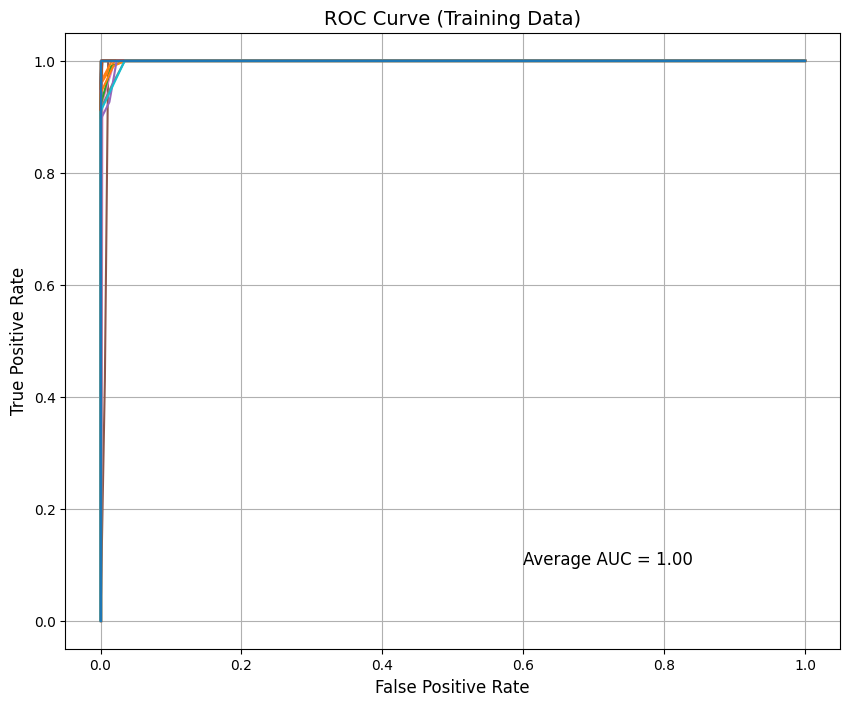

Average AUC: 1.00


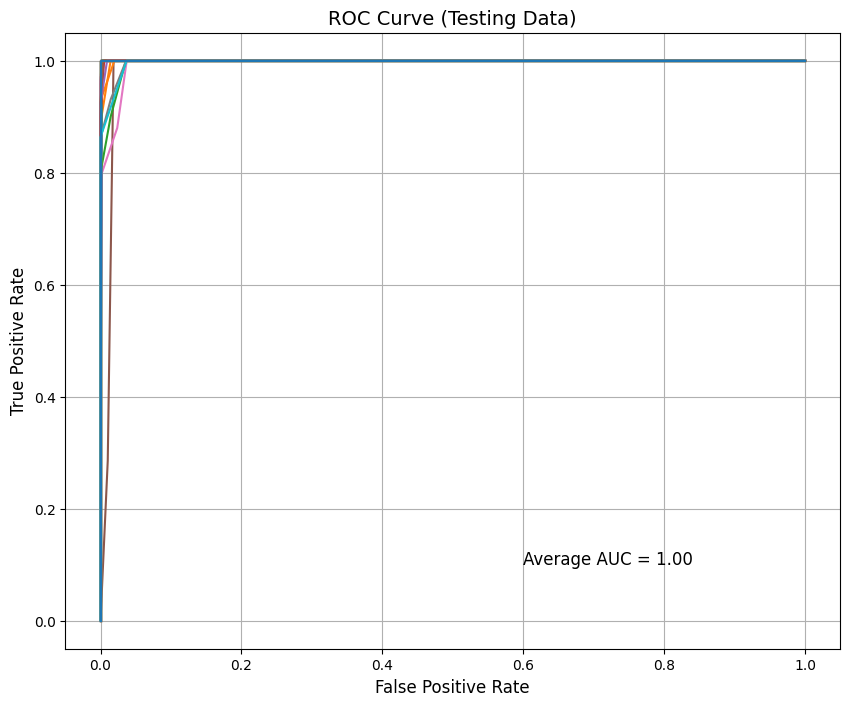

Average AUC: 1.00


In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_roc_curve(model, X, y, dataset_type):
    y_pred_proba = model.predict_proba(X)
    plt.figure(figsize=(10, 8))  # Increase image size
    auc_scores = []
    
    if len(set(y)) > 2:  # Multi-class
        y_binarized = label_binarize(y, classes=sorted(set(y)))
        
        for i in range(y_binarized.shape[1]):
            fpr, tpr, _ = roc_curve(y_binarized[:, i], y_pred_proba[:, i])
            auc = roc_auc_score(y_binarized[:, i], y_pred_proba[:, i])
            auc_scores.append(auc)
            plt.plot(fpr, tpr)  # Plot the ROC curve without labeling individual AUC
        
        plt.title(f'ROC Curve ({dataset_type})', fontsize=14)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.grid()

        # Display the average AUC score beside the plot
        avg_auc = sum(auc_scores) / len(auc_scores)
        plt.text(0.6, 0.1, f'Average AUC = {avg_auc:.2f}', fontsize=12, color='black')

        plt.show()
        print(f'Average AUC: {avg_auc:.2f}')
    
    else:  # Binary classification
        fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
        auc = roc_auc_score(y, y_pred_proba[:, 1])
        plt.plot(fpr, tpr)  # Plot the ROC curve without labeling individual AUC
        
        plt.title(f'ROC Curve ({dataset_type})', fontsize=14)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.grid()

        # Display the AUC score beside the plot for binary classification
        plt.text(0.6, 0.1, f'AUC = {auc:.2f}', fontsize=12, color='black')
        
        plt.show()

# Plot for training data
plot_roc_curve(MLP_clf_1, X_train, y_train, "Training Data")

# Plot for testing data
plot_roc_curve(MLP_clf_1, X_test, y_test, "Testing Data")


Epoch 1/50
Train Accuracy: 0.9783, Test Accuracy: 0.9597
Epoch 2/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 3/50
Train Accuracy: 0.9781, Test Accuracy: 0.9668
Epoch 4/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 5/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 6/50
Train Accuracy: 0.9781, Test Accuracy: 0.9668
Epoch 7/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 8/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 9/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 10/50
Train Accuracy: 0.9781, Test Accuracy: 0.9668
Epoch 11/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 12/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 13/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 14/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 15/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 16/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 17/50
Train Accuracy: 0.9778, Test Accuracy: 0.9678
Epoch 18/50
Train Accur

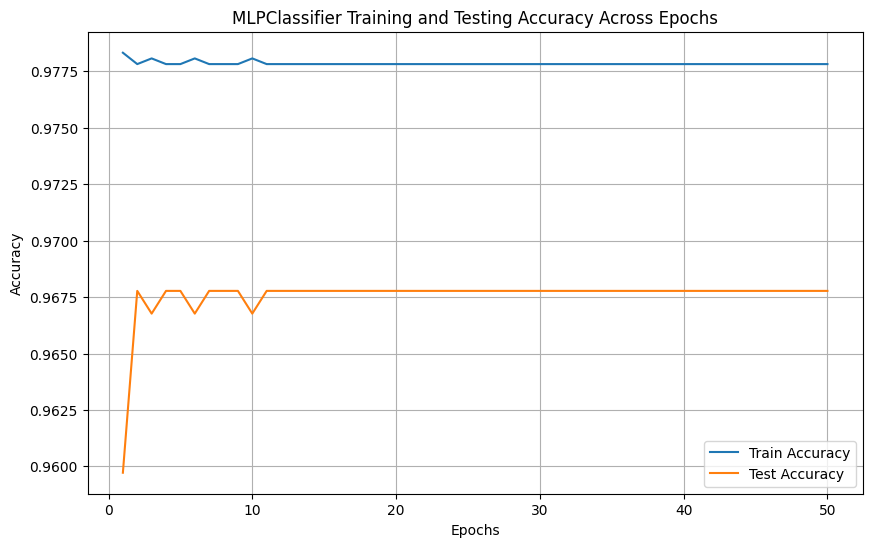

In [42]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, and y_test are already defined and preprocessed

# Create the MLP classifier with `warm_start=True`
MLP_clf = MLPClassifier(
    solver='adam',
    alpha=1e-5,  # Increased regularization (you can tune this value)
    max_iter=200,  # Perform more iterations to allow the model to converge
    hidden_layer_sizes=(50,25, 15,7),
    warm_start=True,
    random_state=50
)

# Lists to store accuracy scores for each epoch
train_accuracies = []
test_accuracies = []

# Number of epochs
epochs = 50

# Train over multiple epochs
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    
    # Fit the model for 1 epoch
    MLP_clf.fit(X_train, y_train)
    
    # Predict and calculate accuracy for both train and test sets
    train_accuracy = accuracy_score(y_train, MLP_clf.predict(X_train))
    test_accuracy = accuracy_score(y_test, MLP_clf.predict(X_test))
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Print classification report for test set
print("\nClassification Report for Test Set:")
print(classification_report(y_test, MLP_clf.predict(X_test)))

# Plot train and test accuracy across epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label='Train Accuracy' )
plt.plot(range(1, epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MLPClassifier Training and Testing Accuracy Across Epochs')
plt.legend()
plt.grid()
plt.show()


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Epoch 1/50 - Train Loss: 0.0698, Test Loss: 0.1029
Epoch 2/50 - Train Loss: 0.0659, Test Loss: 0.0993
Epoch 3/50 - Train Loss: 0.0693, Test Loss: 0.1000
Epoch 4/50 - Train Loss: 0.0678, Test Loss: 0.0991
Epoch 5/50 - Train Loss: 0.0679, Test Loss: 0.0998
Epoch 6/50 - Train Loss: 0.0669, Test Loss: 0.0994
Epoch 7/50 - Train Loss: 0.0670, Test Loss: 0.0994
Epoch 8/50 - Train Loss: 0.0673, Test Loss: 0.0989
Epoch 9/50 - Train Loss: 0.0672, Test Loss: 0.0975
Epoch 10/50 - Train Loss: 0.0674, Test Loss: 0.0979
Epoch 11/50 - Train Loss: 0.0674, Test Loss: 0.0975
Epoch 12/50 - Train Loss: 0.0672, Test Loss: 0.0976
Epoch 13/50 - Train Loss: 0.0677, Test Loss: 0.0975
Epoch 14/50 - Train Loss: 0.0675, Test Loss: 0.0975
Epoch 15/50 - Train Loss: 0.0676, Test Loss: 0.0974
Epoch 16/50 - Train Loss: 0.0678, Test Loss: 0.0975
Epoch 17/50 - Train Loss: 0.0678, Test Loss: 0.0973
Epoch 18/50 - Train Loss: 0.0677, Test Loss: 0.0977
Epoch 19/50 - Train Loss: 0.0677, Test Loss: 0.0977
Epoch 20/50 - Train L

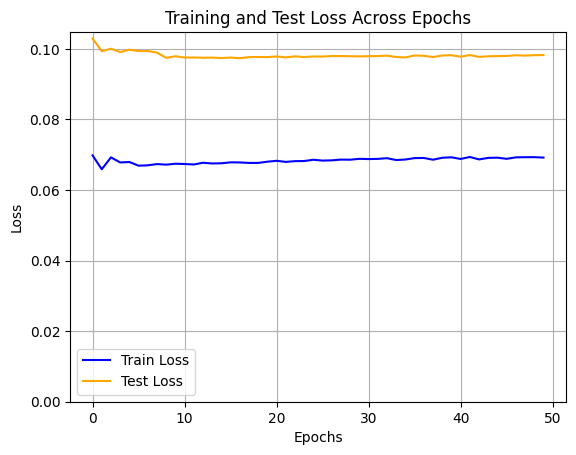

In [43]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split


# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the MLP classifier
MLP_clf = MLPClassifier(solver='adam', alpha=1e-5, max_iter=100, warm_start=True, hidden_layer_sizes=(50,25, 15, 7), random_state=50)

# Initialize lists to store loss values
train_losses = []
test_losses = []

# Train the model and track losses at each epoch
epochs = 50
for epoch in range(epochs):
    # Fit model for current epoch
    MLP_clf.fit(X_train, y_train)
    
    # Calculate training loss using log_loss
    train_loss = log_loss(y_train, MLP_clf.predict_proba(X_train))
    
    # Calculate test loss using log_loss
    test_loss = log_loss(y_test, MLP_clf.predict_proba(X_test))
    
    # Append losses to lists
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    print(f"Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

# Plot the training and test loss curves
plt.plot(range(epochs), train_losses, label='Train Loss', color='blue')
plt.plot(range(epochs), test_losses, label='Test Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(bottom=0.0)
plt.title('Training and Test Loss Across Epochs')
plt.legend()
plt.grid(True)
plt.show()


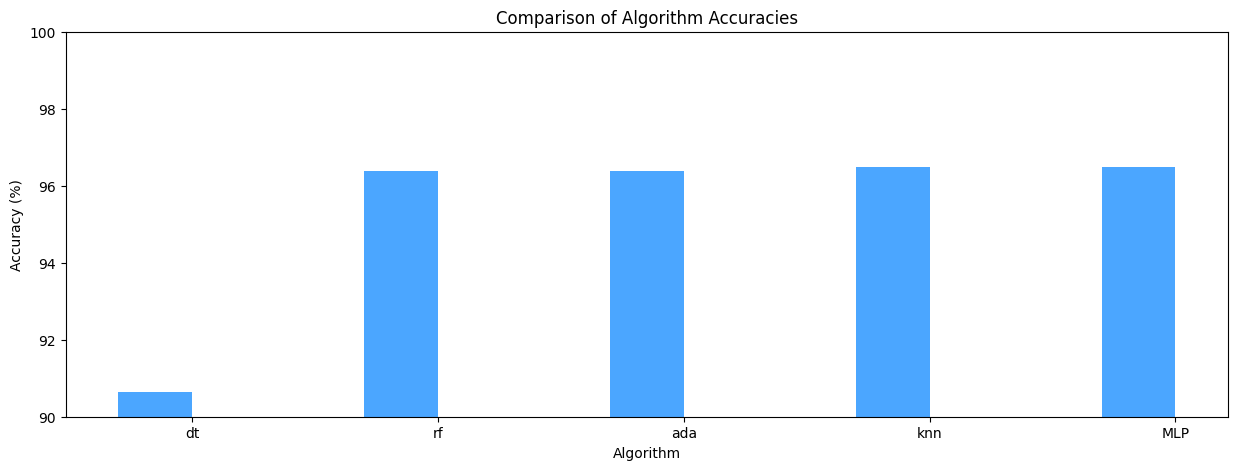

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score



# Data to plot
n_groups = 5# Added one more group for AdaBoost
algorithms = ('dt','rf','ada','knn','MLP')


test_accuracy = (
    
    accuracy_score(y_test, tree_clf.predict(X_test)) * 100,
    accuracy_score(y_test, rf_clf.predict(X_test)) * 100,
    accuracy_score(y_test, MLP_clf_1.predict(X_test)) * 100,
    accuracy_score(y_test, knn_clf.predict(X_test)) * 100,
    accuracy_score(y_test, best_ada_clf.predict(X_test)) * 100,
    
  
)

# Create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

# Plot bars for each algorithm
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha=opacity, color='dodgerblue', label='Test')

# Labels and title
plt.xlabel('Algorithm')  # x axis label
plt.ylabel('Accuracy (%)')  # y axis label
plt.ylim(90,100 ) 
plt.title('Comparison of Algorithm Accuracies')  # plot title
plt.xticks(index + bar_width * 1.5, algorithms)  # x axis data labels


# Show the plot
plt.show()


In [45]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier


# Create a Voting Classifier with hard voting
voting_clf = VotingClassifier(
    estimators=[
        
        ('mlp', MLP_clf_1),         
        ('knn', knn_clf),
        ('ADA',best_ada_clf)                 
    ],
    voting='hard'  
)


voting_clf.fit(X_train, y_train)


y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Majority Voting Classifier Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred))

print_score(voting_clf, X_train, y_train, X_test, y_test, train=True)
print_score(voting_clf, X_train, y_train, X_test, y_test, train=False)

print("Individual Model Performance on Test Set:")
print(f"decision tree Accuracy: {accuracy_score(y_test, tree_clf.predict(X_test)):.2f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_clf.predict(X_test)):.2f}")
print(f"MLP Accuracy: {accuracy_score(y_test, MLP_clf.predict(X_test)):.4f}")
print(f"KNN Accuracy: {accuracy_score(y_test, knn_clf.predict(X_test)):.4f}")
print(f"Ada Accuracy: {accuracy_score(y_test, best_ada_clf.predict(X_test)):.4f}")



Majority Voting Classifier Accuracy: 0.9648
                              precision    recall  f1-score   support

                        Acne       0.96      1.00      0.98        25
         Alcoholic hepatitis       1.00      0.93      0.96        29
                     Allergy       1.00      1.00      1.00        26
                   Arthritis       1.00      1.00      1.00        24
            Bronchial Asthma       1.00      0.86      0.93        29
        Cervical spondylosis       0.54      1.00      0.70        21
                 Chicken pox       1.00      1.00      1.00        20
         Chronic cholestasis       0.92      1.00      0.96        24
                 Common Cold       1.00      1.00      1.00        20
                      Dengue       1.00      1.00      1.00        29
                    Diabetes       0.95      1.00      0.98        21
       Dimorphic hemorrhoids       1.00      0.89      0.94        18
               Drug Reaction       1.00      

In [46]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV



# Create a Voting Classifier with hard voting
voting_clf_soft = VotingClassifier(
    estimators=[     
        ('mlp', MLP_clf_1),          
        ('knn', knn_clf),
        ('ADA',best_ada_clf)                 
    ],
    voting='soft',
    
)


voting_clf_soft.fit(X_train, y_train)

# Make predictions using the majority voting classifier
y_pred = voting_clf_soft.predict(X_test)

# Evaluate the performance using accuracy or any other metric
accuracy = accuracy_score(y_test, y_pred)
print(f"Majority Voting Classifier Accuracy: {accuracy:.4f}")

# Additional metrics such as classification report
print(classification_report(y_test, y_pred))

print_score(voting_clf_soft, X_train, y_train, X_test, y_test, train=True)
print_score(voting_clf_soft, X_train, y_train, X_test, y_test, train=False)


# If you want to check performance of the individual models:
print("Individual Model Performance on Test Set:")
print(f"MLP Accuracy: {accuracy_score(y_test, MLP_clf_1.predict(X_test)):.2f}")
print(f"KNN Accuracy: {accuracy_score(y_test, knn_clf.predict(X_test)):.2f}")
print(f"Ada Accuracy: {accuracy_score(y_test, best_ada_clf.predict(X_test)):.2f}")



Majority Voting Classifier Accuracy: 0.9648
                              precision    recall  f1-score   support

                        Acne       0.96      1.00      0.98        25
         Alcoholic hepatitis       1.00      0.93      0.96        29
                     Allergy       1.00      1.00      1.00        26
                   Arthritis       1.00      1.00      1.00        24
            Bronchial Asthma       1.00      0.86      0.93        29
        Cervical spondylosis       0.54      1.00      0.70        21
                 Chicken pox       1.00      1.00      1.00        20
         Chronic cholestasis       0.92      1.00      0.96        24
                 Common Cold       1.00      1.00      1.00        20
                      Dengue       1.00      1.00      1.00        29
                    Diabetes       0.95      1.00      0.98        21
       Dimorphic hemorrhoids       1.00      0.89      0.94        18
               Drug Reaction       1.00      

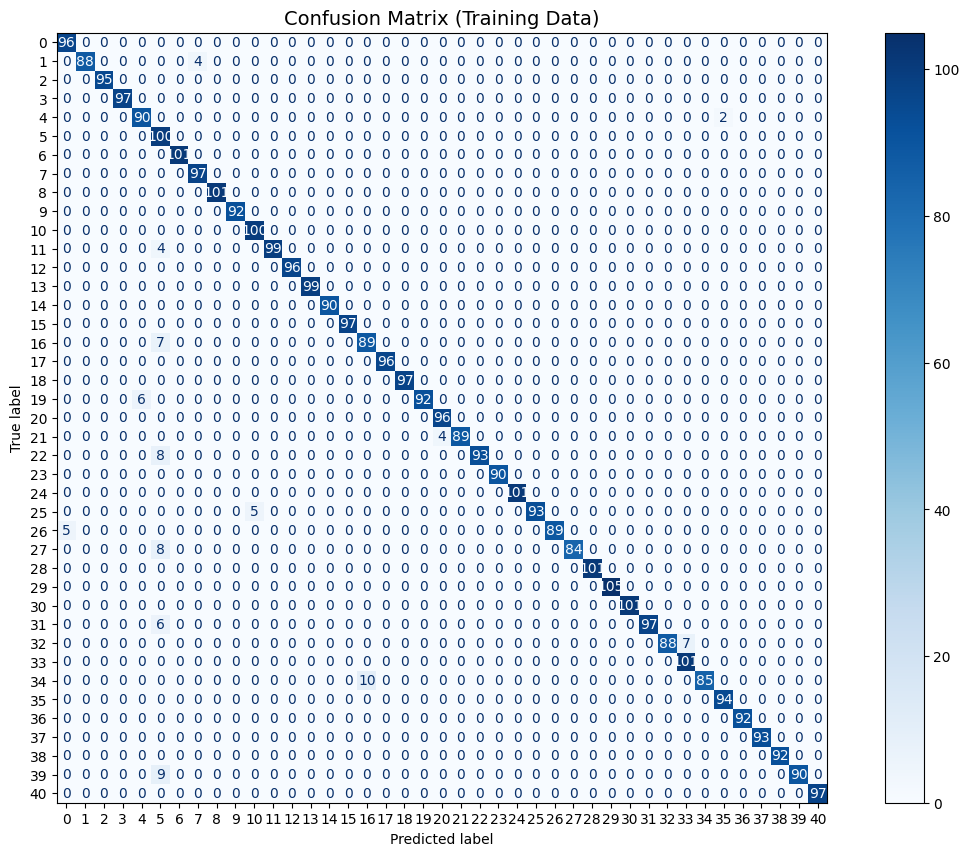

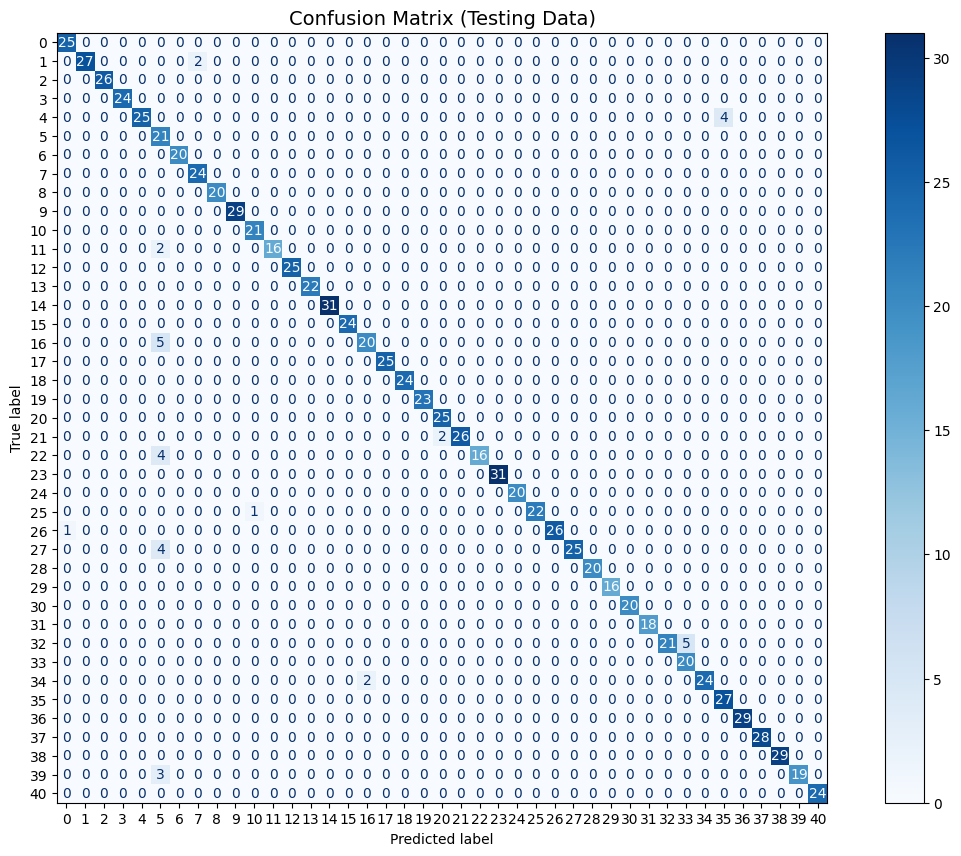

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_confusion_matrix(model, X, y, dataset_type):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    fig, ax = plt.subplots(figsize=(15, 10))  # Increase image size
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f'Confusion Matrix ({dataset_type})', fontsize=14)
    plt.show()

# Plot for training data
plot_confusion_matrix(voting_clf_soft, X_train, y_train, "Training Data")

# Plot for testing data
plot_confusion_matrix(voting_clf_soft, X_test, y_test, "Testing Data")

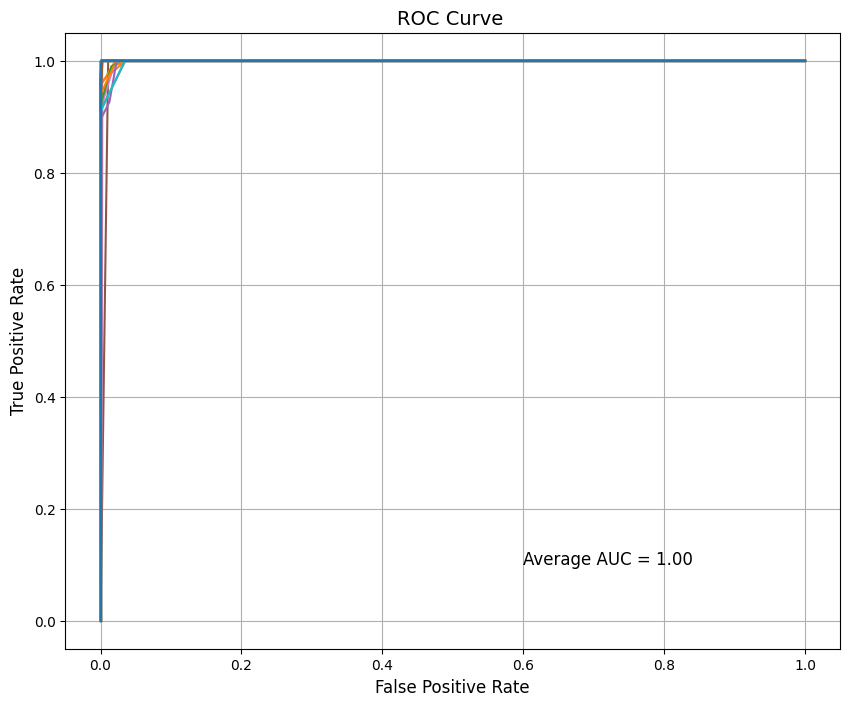

Average AUC: 1.00


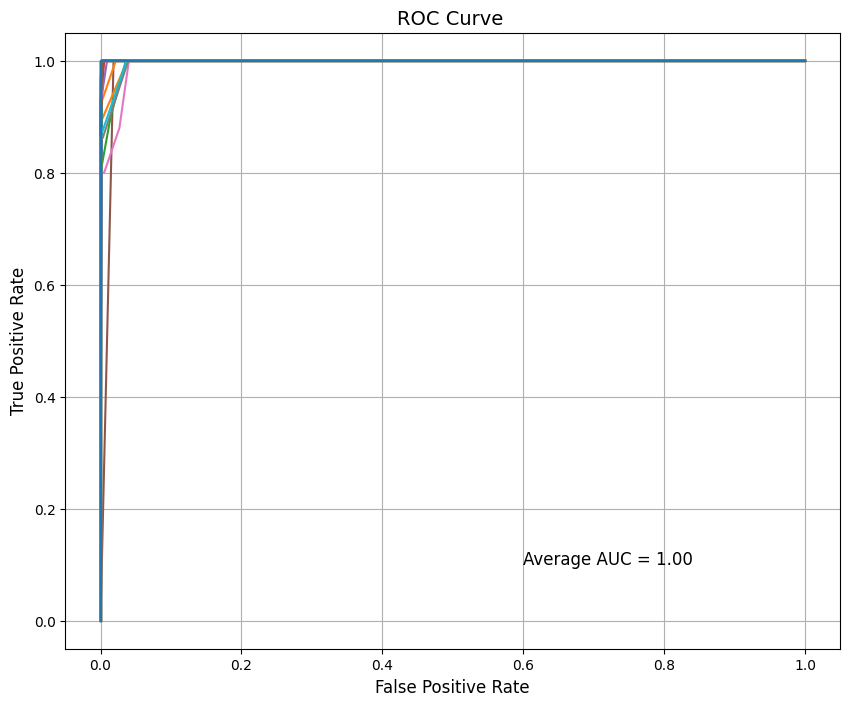

Average AUC: 1.00


In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_roc_curve(model, X, y, dataset_type):
    y_pred_proba = model.predict_proba(X)
    plt.figure(figsize=(10, 8))  # Increase image size
    auc_scores = []
    
    if len(set(y)) > 2:  # Multi-class
        y_binarized = label_binarize(y, classes=sorted(set(y)))
        
        for i in range(y_binarized.shape[1]):
            fpr, tpr, _ = roc_curve(y_binarized[:, i], y_pred_proba[:, i])
            auc = roc_auc_score(y_binarized[:, i], y_pred_proba[:, i])
            auc_scores.append(auc)
            plt.plot(fpr, tpr)  # Plot the ROC curve without labeling individual AUC
        
        plt.title(f'ROC Curve ', fontsize=14)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.grid()

        # Display the average AUC score beside the plot
        avg_auc = sum(auc_scores) / len(auc_scores)
        plt.text(0.6, 0.1, f'Average AUC = {avg_auc:.2f}', fontsize=12, color='black')

        plt.show()
        print(f'Average AUC: {avg_auc:.2f}')
    
    else:  # Binary classification
        fpr, tpr, _ = roc_curve(y, y_pred_proba[:, 1])
        auc = roc_auc_score(y, y_pred_proba[:, 1])
        plt.plot(fpr, tpr)  # Plot the ROC curve without labeling individual AUC
        
        plt.title(f'ROC Curve', fontsize=14)
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.grid()

        # Display the AUC score beside the plot for binary classification
        plt.text(0.6, 0.1, f'AUC = {auc:.2f}', fontsize=12, color='black')
        
        plt.show()

# Plot for training data
plot_roc_curve(voting_clf_soft, X_train, y_train, "Training Data")

# Plot for testing data
plot_roc_curve(voting_clf_soft, X_test, y_test, "Testing Data")


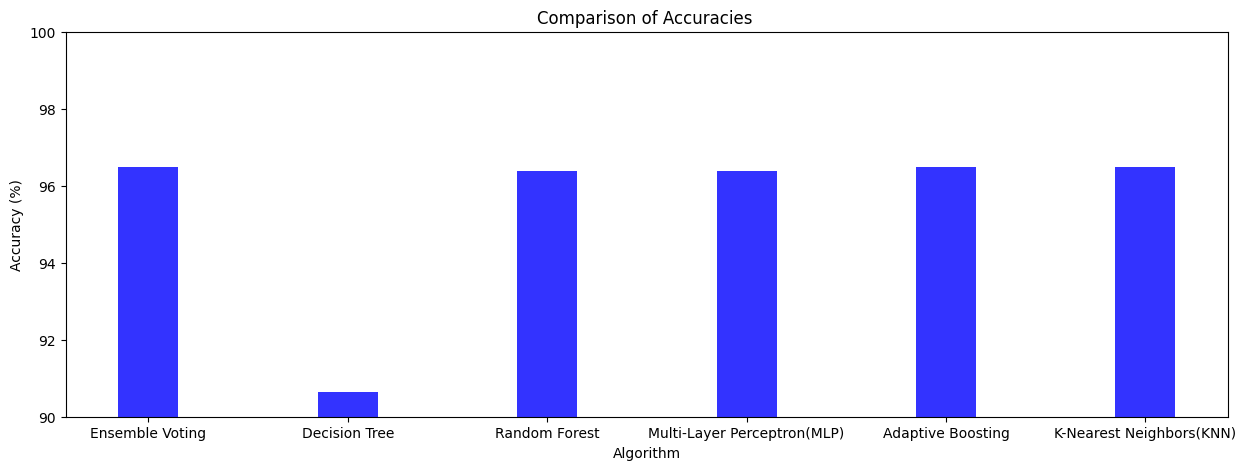

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming that you've trained your models: lr_clf, knn_clf, svm_clf, rf_clf, tree_clf, MLP_clf, adaboost_clf

# Data to plot
n_groups = 6  # Number of algorithms
algorithms = ('Ensemble Voting', 'Decision Tree','Random Forest','Multi-Layer Perceptron(MLP)','Adaptive Boosting', 'K-Nearest Neighbors(KNN)')

test_accuracy = (
    accuracy_score(y_test, voting_clf.predict(X_test)) * 100,
    accuracy_score(y_test, tree_clf.predict(X_test)) * 100,
    accuracy_score(y_test, rf_clf.predict(X_test)) * 100,
     accuracy_score(y_test, MLP_clf_1.predict(X_test)) * 100,
    accuracy_score(y_test, best_ada_clf.predict(X_test)) * 100,
    accuracy_score(y_test, knn_clf.predict(X_test)) * 100,
    # accuracy_score(y_test, MLP_clf_1.predict(X_test)) * 100,
)

# Create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

# Plot bars for test accuracy
rects2 = plt.bar(index, test_accuracy, bar_width, alpha=opacity, color='blue', label='Test')

# Labels and title
plt.xlabel('Algorithm')  # x-axis label
plt.ylabel('Accuracy (%)')  # y-axis label
plt.ylim(90, 100)  # Set y-axis range from 89 to 95
plt.title('Comparison of Accuracies ')  # Plot title
plt.xticks(index, algorithms)  # x-axis data labels
# plt.legend(loc='upper right')  # Show legend


plt.show()

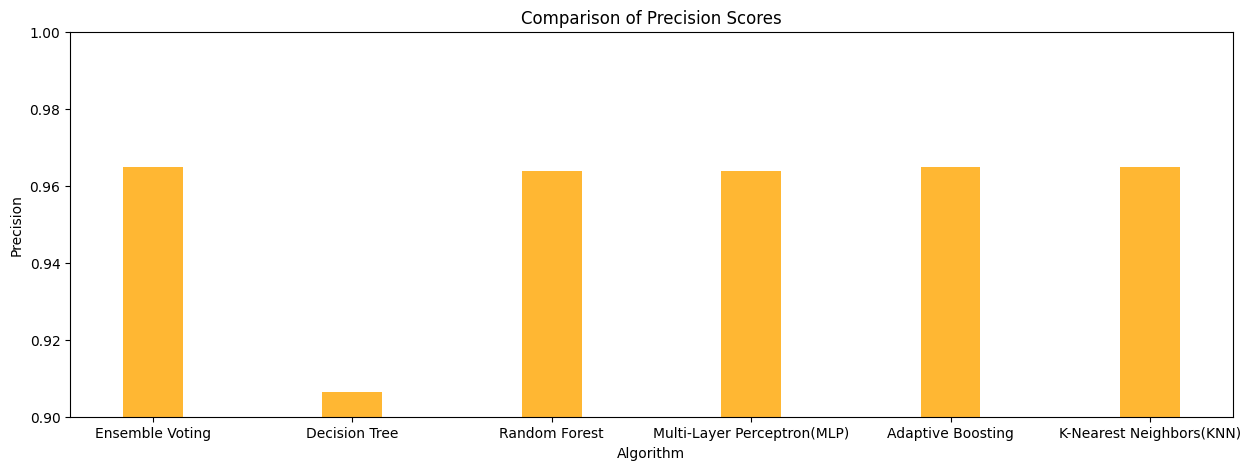

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score

# Assuming trained models: tree_clf, rf_clf, best_ada_clf, knn_clf, MLP_clf_1

# Data to plot
n_groups = 6 # Number of algorithms
algorithms = ('Ensemble Voting', 'Decision Tree','Random Forest','Multi-Layer Perceptron(MLP)','Adaptive Boosting', 'K-Nearest Neighbors(KNN)')

# Compute precision scores for each model
test_precision = (
    precision_score(y_test, voting_clf.predict(X_test), average='micro'),
    precision_score(y_test, tree_clf.predict(X_test), average='micro'),
    precision_score(y_test, rf_clf.predict(X_test), average='micro') ,
    precision_score(y_test, MLP_clf_1.predict(X_test), average='micro') ,
    precision_score(y_test, best_ada_clf.predict(X_test), average='micro') ,
    precision_score(y_test, knn_clf.predict(X_test), average='micro')
    
)

# Create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

# Plot bars for test precision
rects2 = plt.bar(index, test_precision, bar_width, alpha=opacity, color='orange', label='Test Precision')

# Labels and title
plt.xlabel('Algorithm')  # x-axis label
plt.ylabel('Precision')  # y-axis label
plt.ylim(0.90,1.00) # Set y-axis range from 89 to 93
plt.title('Comparison of Precision Scores')  # Plot title
plt.xticks(index, algorithms)  # x-axis data labels

plt.show()


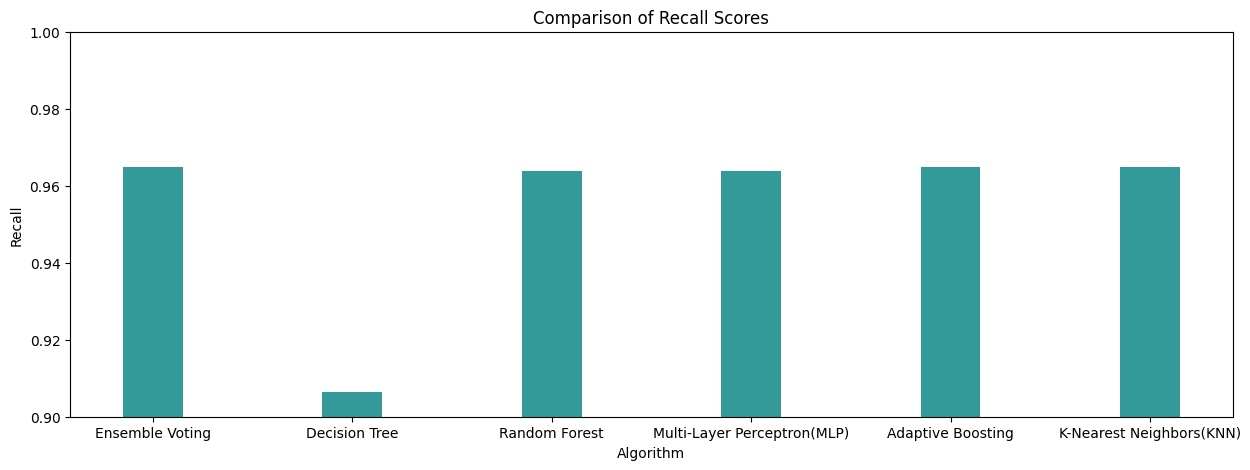

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import recall_score

# Assuming trained models: tree_clf, rf_clf, best_ada_clf, knn_clf, MLP_clf_1

n_groups = 6 # Number of algorithms
algorithms = ('Ensemble Voting', 'Decision Tree','Random Forest','Multi-Layer Perceptron(MLP)','Adaptive Boosting', 'K-Nearest Neighbors(KNN)')

# Compute recall scores for each model
test_recall = (
    recall_score(y_test, voting_clf.predict(X_test), average='micro') ,
    recall_score(y_test, tree_clf.predict(X_test), average='micro') ,
    recall_score(y_test, rf_clf.predict(X_test), average='micro') ,
     recall_score(y_test, MLP_clf_1.predict(X_test), average='micro'),
    recall_score(y_test, best_ada_clf.predict(X_test), average='micro'),
    recall_score(y_test, knn_clf.predict(X_test), average='micro') ,

)

# Create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

# Plot bars for test recall
rects2 = plt.bar(index, test_recall, bar_width, alpha=opacity, color='teal', label='Test Recall')

# Labels and title
plt.xlabel('Algorithm')  # x-axis label
plt.ylabel('Recall')  # y-axis label
plt.ylim(0.90, 1.00)  # Set y-axis range from 89 to 93
plt.title('Comparison of Recall Scores')  # Plot title
plt.xticks(index, algorithms)  # x-axis data labels

plt.show()


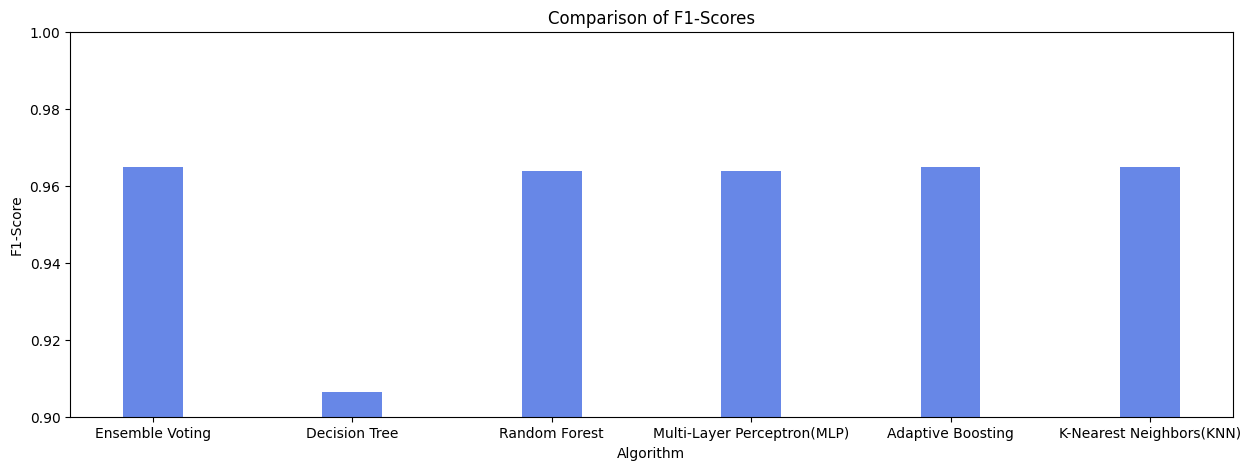

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

# Assuming trained models: tree_clf, rf_clf, best_ada_clf, knn_clf, MLP_clf_1

# Data to plot
n_groups = 6 # Number of algorithms
algorithms = ('Ensemble Voting', 'Decision Tree','Random Forest','Multi-Layer Perceptron(MLP)','Adaptive Boosting', 'K-Nearest Neighbors(KNN)')

# Compute F1 scores for each model
test_f1 = (
    f1_score(y_test, voting_clf.predict(X_test), average='micro'),
    f1_score(y_test, tree_clf.predict(X_test), average='micro'),
    f1_score(y_test, rf_clf.predict(X_test), average='micro') ,
    f1_score(y_test, MLP_clf_1.predict(X_test), average='micro') ,
    f1_score(y_test, best_ada_clf.predict(X_test), average='micro') ,
    f1_score(y_test, knn_clf.predict(X_test), average='micro') ,
    
)

# Create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

# Plot bars for test F1-score
rects2 = plt.bar(index, test_f1, bar_width, alpha=opacity, color='royalblue', label='Test F1-Score')

# Labels and title
plt.xlabel('Algorithm')  # x-axis label
plt.ylabel('F1-Score')  # y-axis label
plt.ylim(0.90,1.00)  # Set y-axis range from 90 to 93
plt.title('Comparison of F1-Scores')  # Plot title
plt.xticks(index, algorithms)  # Slight rotation to prevent overlap

plt.show()


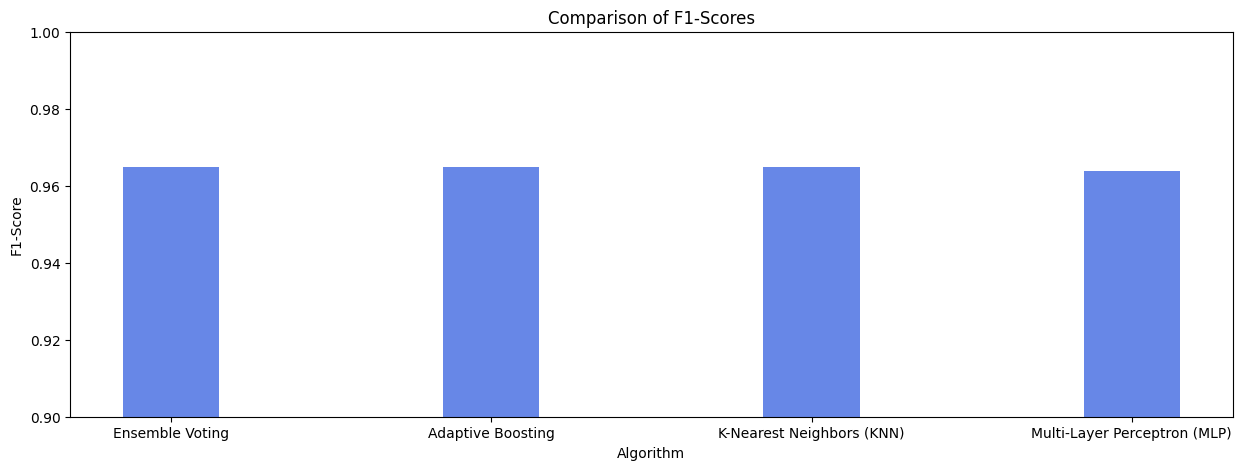

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score


# Data to plot
n_groups = 4  # Number of algorithms
algorithms = ('Ensemble Voting', 'Adaptive Boosting', 'K-Nearest Neighbors (KNN)', 'Multi-Layer Perceptron (MLP)')

# Compute F1 scores for each model
test_f1 = (
    f1_score(y_test, voting_clf.predict(X_test), average='micro'),
    f1_score(y_test, best_ada_clf.predict(X_test), average='micro') ,
    f1_score(y_test, knn_clf.predict(X_test), average='micro') ,
    f1_score(y_test, MLP_clf_1.predict(X_test), average='micro') ,
)

# Create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8

# Plot bars for test F1-score
rects2 = plt.bar(index, test_f1, bar_width, alpha=opacity, color='royalblue', label='Test F1-Score')

# Labels and title
plt.xlabel('Algorithm')  # x-axis label
plt.ylabel('F1-Score')  # y-axis label
plt.ylim(0.90,1.00)  # Set y-axis range from 90 to 93
plt.title('Comparison of F1-Scores')  # Plot title
plt.xticks(index, algorithms)  # Slight rotation to prevent overlap


plt.show()


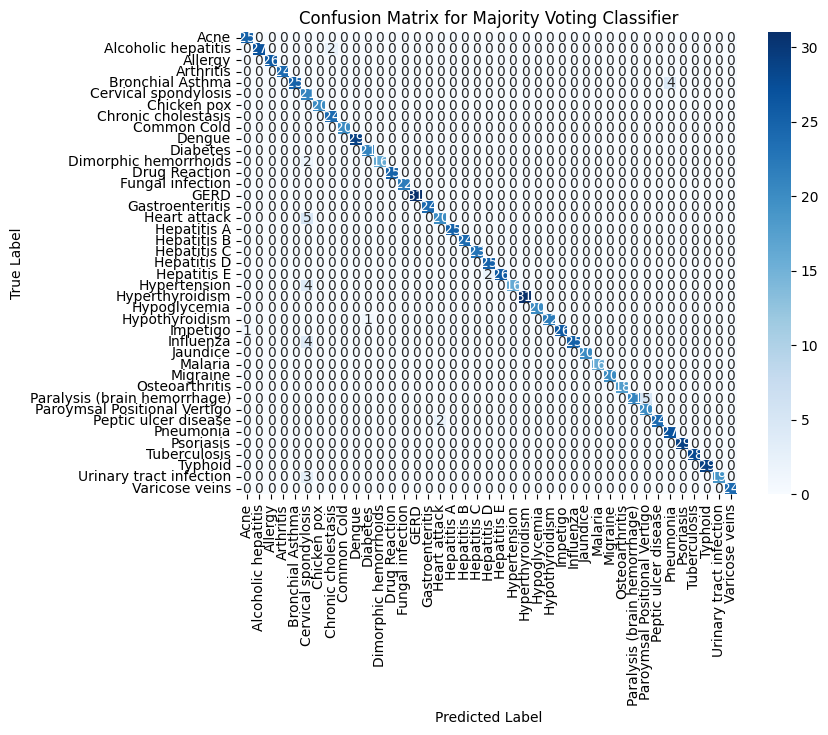


Classification Report:
                               precision    recall  f1-score   support

                        Acne       0.96      1.00      0.98        25
         Alcoholic hepatitis       1.00      0.93      0.96        29
                     Allergy       1.00      1.00      1.00        26
                   Arthritis       1.00      1.00      1.00        24
            Bronchial Asthma       1.00      0.86      0.93        29
        Cervical spondylosis       0.54      1.00      0.70        21
                 Chicken pox       1.00      1.00      1.00        20
         Chronic cholestasis       0.92      1.00      0.96        24
                 Common Cold       1.00      1.00      1.00        20
                      Dengue       1.00      1.00      1.00        29
                    Diabetes       0.95      1.00      0.98        21
       Dimorphic hemorrhoids       1.00      0.89      0.94        18
               Drug Reaction       1.00      1.00      1.00     

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make predictions using the majority voting classifier
y_pred = voting_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = np.unique(y_test)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Labels and Title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Majority Voting Classifier')
plt.show()

# Print classification report for additional metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))


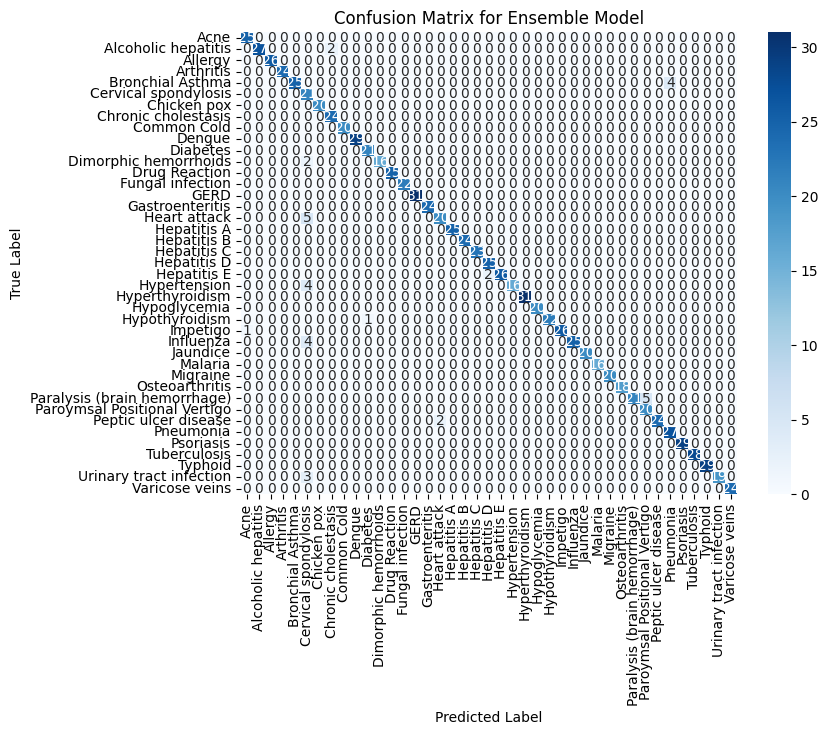


Classification Report:
                               precision    recall  f1-score   support

                        Acne       0.96      1.00      0.98        25
         Alcoholic hepatitis       1.00      0.93      0.96        29
                     Allergy       1.00      1.00      1.00        26
                   Arthritis       1.00      1.00      1.00        24
            Bronchial Asthma       1.00      0.86      0.93        29
        Cervical spondylosis       0.54      1.00      0.70        21
                 Chicken pox       1.00      1.00      1.00        20
         Chronic cholestasis       0.92      1.00      0.96        24
                 Common Cold       1.00      1.00      1.00        20
                      Dengue       1.00      1.00      1.00        29
                    Diabetes       0.95      1.00      0.98        21
       Dimorphic hemorrhoids       1.00      0.89      0.94        18
               Drug Reaction       1.00      1.00      1.00     

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions from the ensemble voting classifier
y_pred = voting_clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Ensemble Model')
plt.show()

# Print classification report for detailed metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
